## Sanju Mathew - Project on Ensemble Techniques

### Objective - The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).
### Step 1 - Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", color_codes=True)
sns.set_palette("Set1")
%matplotlib inline

### Step 2 - Read the data as a data frame

In [2]:
df = pd.read_csv('bank-full.csv')
df.drop('duration', axis=1, inplace=True) 
df.rename(columns = {'age':'Age', 'job':'Job_Type', 'marital':'Marital_Status', 'education':'Education', 'default':'Credit_Default', 'balance':'Avg_Yearly_Balance', 'housing':'Housing_Loan', 'loan':'Personal_Loan', 'contact':'Contact_Type', 'day':'Contact_Date', 'month':'Contact_Month', 'campaign':'Campaign_Contacts', 'pdays':'Passed_Days', 'previous':'Previous_Contacts', 'poutcome':'Previous_Outcome'}, inplace=True) 
df.head()

Age      Job_Type Marital_Status  Education Credit_Default  \
0   58    management        married   tertiary             no   
1   44    technician         single  secondary             no   
2   33  entrepreneur        married  secondary             no   
3   47   blue-collar        married    unknown             no   
4   33       unknown         single    unknown             no   

   Avg_Yearly_Balance Housing_Loan Personal_Loan Contact_Type  Contact_Date  \
0                2143          yes            no      unknown             5   
1                  29          yes            no      unknown             5   
2                   2          yes           yes      unknown             5   
3                1506          yes            no      unknown             5   
4                   1           no            no      unknown             5   

  Contact_Month  Campaign_Contacts  Passed_Days  Previous_Contacts  \
0           may                  1           -1                  0   
1           may                  1           -1                  0   
2           may                  1           -1                  0   
3           may                  1           -1                  0   
4           may                  1           -1                  0   

  Previous_Outcome Target  
0          unknown     no  
1          unknown     no  
2          unknown     no  
3          unknown     no  
4          unknown     no

Dropping input 'duration' to have a realistic predictive model, as it is not known before a call is performed.

### Step 3 - Perform basic EDA which should include the following and print out your insights at every step.

#### Step 3A -  Shape of the data

In [3]:
df.shape

(45211, 16)

#### Step 3B -  Data type of each attribute

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
Age                   45211 non-null int64
Job_Type              45211 non-null object
Marital_Status        45211 non-null object
Education             45211 non-null object
Credit_Default        45211 non-null object
Avg_Yearly_Balance    45211 non-null int64
Housing_Loan          45211 non-null object
Personal_Loan         45211 non-null object
Contact_Type          45211 non-null object
Contact_Date          45211 non-null int64
Contact_Month         45211 non-null object
Campaign_Contacts     45211 non-null int64
Passed_Days           45211 non-null int64
Previous_Contacts     45211 non-null int64
Previous_Outcome      45211 non-null object
Target                45211 non-null object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


* Data has 45211 entries with 17 variables (with 'duration').
* It appears to be complete without any null values.
* All the variable values are either integers or objects.

#### Step 3C -  Checking the presence of missing values

In [5]:
df.isna().apply(pd.value_counts)

Age  Job_Type  Marital_Status  Education  Credit_Default  \
False  45211     45211           45211      45211           45211   

       Avg_Yearly_Balance  Housing_Loan  Personal_Loan  Contact_Type  \
False               45211         45211          45211         45211   

       Contact_Date  Contact_Month  Campaign_Contacts  Passed_Days  \
False         45211          45211              45211        45211   

       Previous_Contacts  Previous_Outcome  Target  
False              45211             45211   45211

Previous Outcome - unknown: 36959
Contact Type - unknown: 13020
Education - unknown: 1857
Job Type - unknown: 288


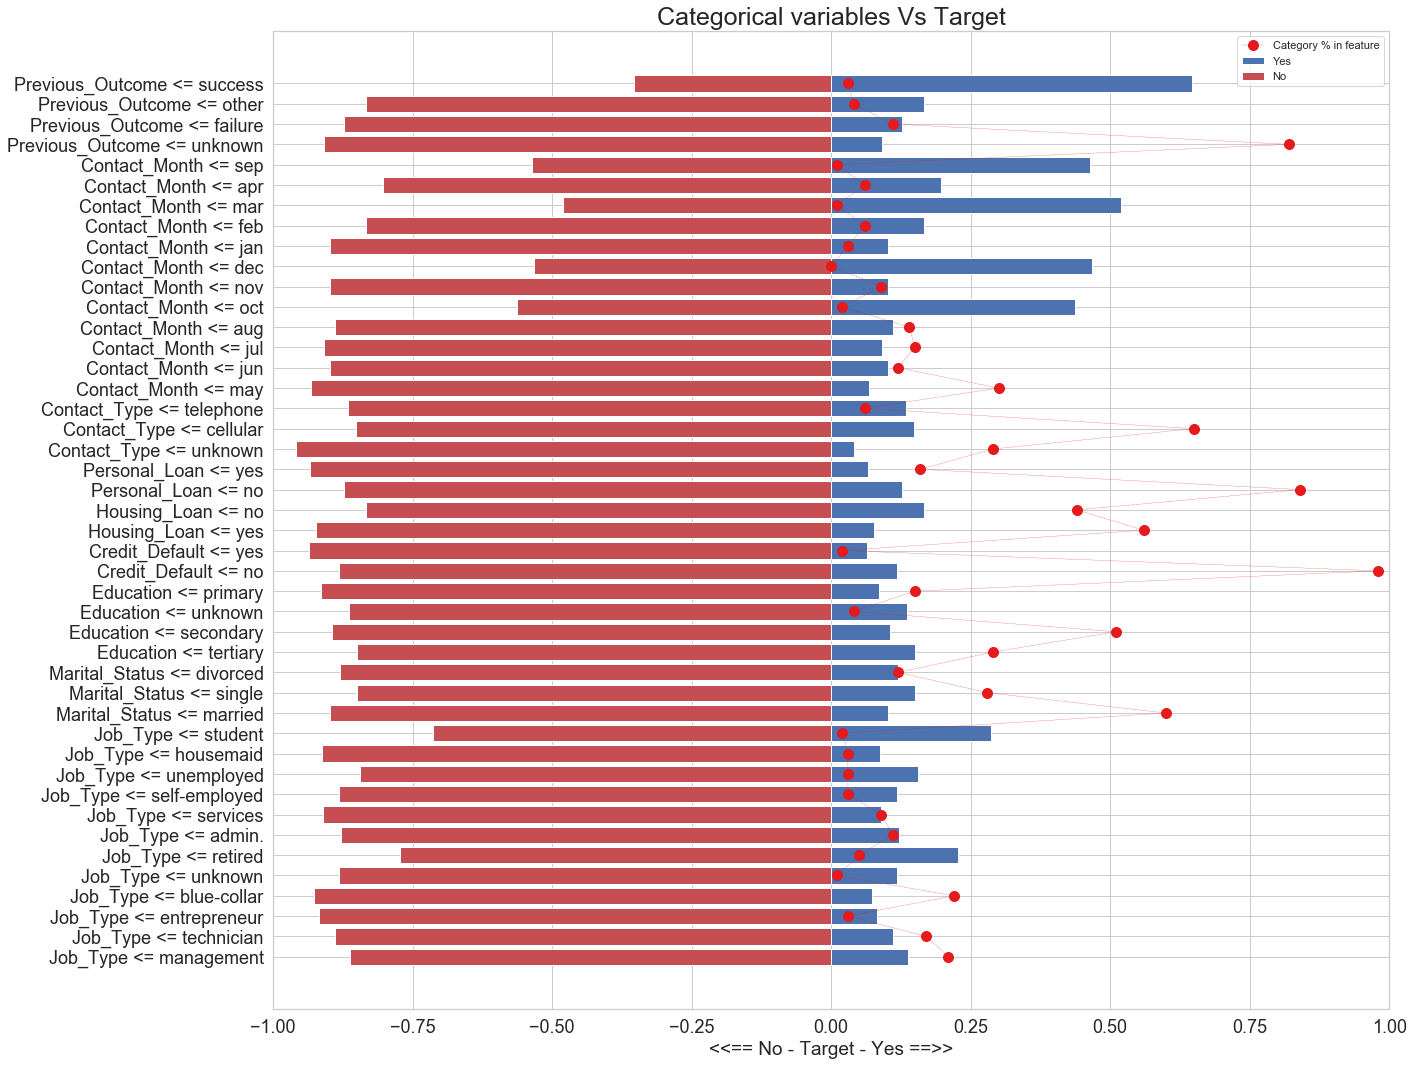

In [6]:
name = []
propo = []
count_yes = []
count_no = []
T = df.shape[0] # Normalise per column
label = 'Target'
for col in df.columns:
    if df[col].dtype == 'object' and col != label:# and col != 'Contact_Month':
        cata = df[col].unique()
        for i in cata:
            N = df[(df[col] == i)][col].value_counts()[0] # Normalise per category
            propo.append(round(N/T,2))
            name.append(col+" <= "+i)
            count_yes.append(((df[(df[col] == i) & (df[label] == 'yes')][col]).value_counts()[0])/N)
            count_no.append(((df[(df[col] == i) & (df[label] == 'no')][col]).value_counts()[0])/-N)
fig = plt.figure(figsize=(20,18))
ax = plt.subplot(111)
ax.set_title('Categorical variables Vs Target', size=25)
ax.set_xlabel('<<== No - Target - Yes ==>>', size=19)
ax.set_xlim(-1, 1)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.barh(name, count_yes, height=0.8, color='b', label='Yes')
ax.barh(name, count_no, height=0.8, color='r', label='No')
ax.plot(propo, name, marker='o', linestyle='dashed', linewidth=.3, markersize=10, label='Category % in feature')
ax.legend()
print('Previous Outcome - unknown:', df.Previous_Outcome[df.Previous_Outcome == 'unknown'].count())
print('Contact Type - unknown:', df.Contact_Type[df.Contact_Type == 'unknown'].count())
print('Education - unknown:', df.Education[df.Education == 'unknown'].count())
print('Job Type - unknown:', df.Job_Type[df.Job_Type == 'unknown'].count())

* Data does not have any NaN or missing values
* There are unknown values for Previous Outcome (36959), Contact Type (13020), Education (1857) & Job Type (288)
* Previous Outcome Success; Contact Month September, March, December & October; Job Type Student & Retired seems to be influencing the Target variable relatively more than rest, while they all represent a small proportion in their category
* There is a huge Previous Outcome unknown (~80%) which might impact the performance of model as previous outcome seems to be influencing the Target most

#### Step 3D -  5 Point summary of numerical attributes

In [7]:
df.describe(include='all').T

count unique          top   freq      mean      std   min  \
Age                 45211    NaN          NaN    NaN   40.9362  10.6188    18   
Job_Type            45211     12  blue-collar   9732       NaN      NaN   NaN   
Marital_Status      45211      3      married  27214       NaN      NaN   NaN   
Education           45211      4    secondary  23202       NaN      NaN   NaN   
Credit_Default      45211      2           no  44396       NaN      NaN   NaN   
Avg_Yearly_Balance  45211    NaN          NaN    NaN   1362.27  3044.77 -8019   
Housing_Loan        45211      2          yes  25130       NaN      NaN   NaN   
Personal_Loan       45211      2           no  37967       NaN      NaN   NaN   
Contact_Type        45211      3     cellular  29285       NaN      NaN   NaN   
Contact_Date        45211    NaN          NaN    NaN   15.8064  8.32248     1   
Contact_Month       45211     12          may  13766       NaN      NaN   NaN   
Campaign_Contacts   45211    NaN          NaN    NaN   2.76384  3.09802     1   
Passed_Days         45211    NaN          NaN    NaN   40.1978  100.129    -1   
Previous_Contacts   45211    NaN          NaN    NaN  0.580323  2.30344     0   
Previous_Outcome    45211      4      unknown  36959       NaN      NaN   NaN   
Target              45211      2           no  39922       NaN      NaN   NaN   

                    25%  50%   75%     max  
Age                  33   39    48      95  
Job_Type            NaN  NaN   NaN     NaN  
Marital_Status      NaN  NaN   NaN     NaN  
Education           NaN  NaN   NaN     NaN  
Credit_Default      NaN  NaN   NaN     NaN  
Avg_Yearly_Balance   72  448  1428  102127  
Housing_Loan        NaN  NaN   NaN     NaN  
Personal_Loan       NaN  NaN   NaN     NaN  
Contact_Type        NaN  NaN   NaN     NaN  
Contact_Date          8   16    21      31  
Contact_Month       NaN  NaN   NaN     NaN  
Campaign_Contacts     1    2     3      63  
Passed_Days          -1   -1    -1     871  
Previous_Contacts     0    0     0     275  
Previous_Outcome    NaN  NaN   NaN     NaN  
Target              NaN  NaN   NaN     NaN

* Average Yearly Balance & Passed Days has negative values
* Negative values in passed days belong to clients that were not previously contacted
* Age ranges from 18 to 95 with a median of 39 and mean of 41
* Average Yearly Balance appears to be heavily right skewed starting from -8019 to 102127 with a median of 448 and mean of 1362.27
* Campaign Contacts & Previous Contacts ranges from 1 to 63 and 0 to 275 respectively

#### Step 3E -  Checking the presence of outliers

 Red: Target No   | Age mean: 40.8 | Avg Balance mean: € 1303.7 | Passed Days mean: 234.2 
 Blue: Target Yes | Age mean: 41.7 | Avg Balance mean: € 1804.3 | Passed Days mean: 192.5


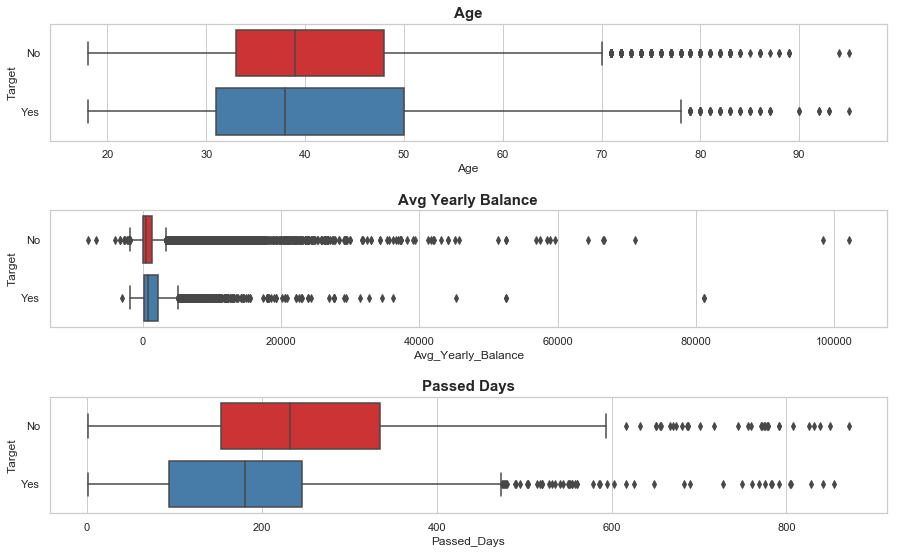

In [8]:
df_Age = pd.DataFrame()
df_Age = df_Age.append(pd.DataFrame({'Target': 'No', 'Age':df[df.Target == 'no']['Age']}))
df_Age = df_Age.append(pd.DataFrame({'Target': 'Yes', 'Age':df[df.Target == 'yes']['Age']}))
df_Avg_Yearly_Balance = pd.DataFrame()
df_Avg_Yearly_Balance = df_Avg_Yearly_Balance.append(pd.DataFrame({'Target': 'No', 'Avg_Yearly_Balance':df[df.Target == 'no']['Avg_Yearly_Balance']}))
df_Avg_Yearly_Balance = df_Avg_Yearly_Balance.append(pd.DataFrame({'Target': 'Yes', 'Avg_Yearly_Balance':df[df.Target == 'yes']['Avg_Yearly_Balance']}))
df_Passed_Days = pd.DataFrame()
df_Passed_Days = df_Passed_Days.append(pd.DataFrame({'Target': 'No', 'Passed_Days':df[(df['Passed_Days'] > 0) & (df['Target'] == 'no')]['Passed_Days']}))
df_Passed_Days = df_Passed_Days.append(pd.DataFrame({'Target': 'Yes', 'Passed_Days':df[(df['Passed_Days'] > 0) & (df['Target'] == 'yes')]['Passed_Days']}))

f, ax = plt.subplots(3, 1, figsize = (15,9))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
sns.boxplot(x = df_Age.Age, y = df_Age.Target, orient="h", ax = ax[0])
ax[0].set_title("Age", size = 15, weight = "bold")
sns.boxplot(x = df_Avg_Yearly_Balance.Avg_Yearly_Balance, y = df_Age.Target, orient="h", ax = ax[1])
ax[1].set_title("Avg Yearly Balance", size = 15, weight = "bold")
sns.boxplot(x = df_Passed_Days.Passed_Days, y = df_Passed_Days.Target, orient="h", ax = ax[2])
ax[2].set_title("Passed Days", size = 15, weight = "bold")

print(" Red: Target No  ", 
      "| Age mean:", (round(df[df.Target == 'no']['Age'].mean(),1)),
      "| Avg Balance mean: €", (round(df[df.Target == 'no']['Avg_Yearly_Balance'].mean(),1)),
      "| Passed Days mean:", (round(df[(df['Passed_Days'] > 0) & (df['Target'] == 'no')]['Passed_Days'].mean(),1)),
      "\n", "Blue: Target Yes",
      "| Age mean:", (round(df[df.Target == 'yes']['Age'].mean(),1)),
      "| Avg Balance mean: €", (round(df[df.Target == 'yes']['Avg_Yearly_Balance'].mean(),1)),
      "| Passed Days mean:", (round(df[(df['Passed_Days'] > 0) & (df['Target'] == 'yes')]['Passed_Days'].mean(),1)))

* Age, Average Yearly Balance & Passed days appears to have lot of outliers as per box plot
* Passed days appears to have a difference of mean (234.2 - 192.5) relative to Targets
* Similarly Average Yearly Balance mean shows a difference of € 500 in comparison to Targets

Distribution of Campaign_Contacts


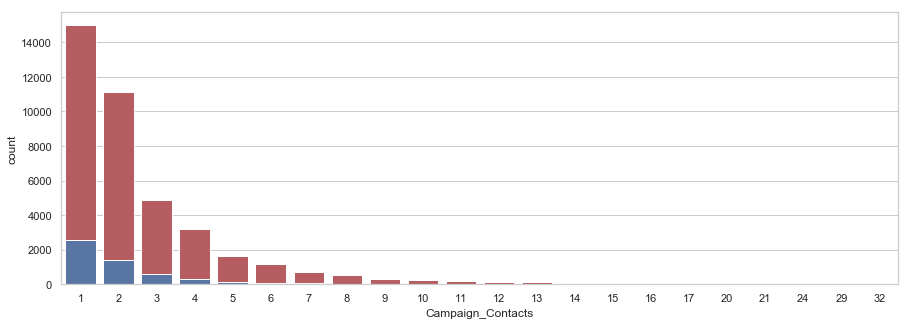

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(df[df.Target == 'no']['Campaign_Contacts'], color='r')
sns.countplot(df[df.Target == 'yes']['Campaign_Contacts'], color='b')
print('Distribution of Campaign_Contacts')

In [10]:
print('Previously contacted with outcome unknown:', df[(df['Previous_Outcome'] == 'unknown') & (df['Previous_Contacts'] > 0)]['Previous_Contacts'].count())
drop_indices = df[(df['Previous_Outcome'] == 'unknown') & (df['Previous_Contacts'] > 0)]['Previous_Contacts'].index
df.drop(drop_indices,inplace=True)
print('Previous Contacts > 32 and Previous Outcome Yes:', df[(df['Previous_Contacts'] > 32) & (df['Previous_Outcome'] == 1)]['Previous_Outcome'].count())
print('Campaign Contacts > 32 and Target Yes:', df[(df['Campaign_Contacts'] > 32) & (df['Target'] == 'yes')]['Target'].count())
df.loc[(df['Previous_Contacts'] > 32), 'Previous_Contacts'] = 33
df.loc[(df['Campaign_Contacts'] > 32), 'Campaign_Contacts'] = 33

Previously contacted with outcome unknown: 5
Previous Contacts > 32 and Previous Outcome Yes: 0
Campaign Contacts > 32 and Target Yes: 0


Previously not contacted: 36954


Previous_Outcome   failure  success
Previous_Contacts                  
28                       1        1

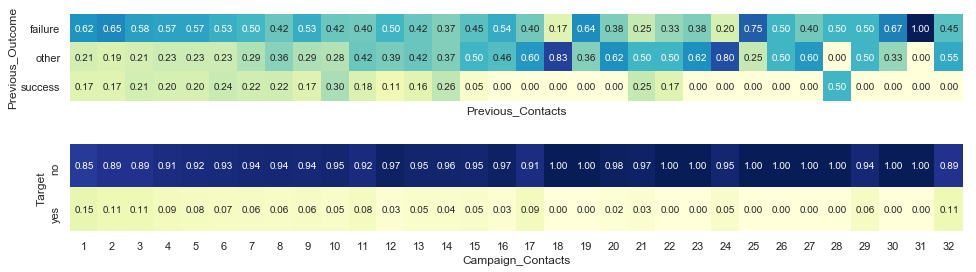

In [11]:
df_PC_PO = pd.crosstab(df[(df['Previous_Contacts'] > 0)]['Previous_Contacts'], df['Previous_Outcome'], normalize = 'index').T
df_CC_T = pd.crosstab(df[(df['Campaign_Contacts'] < 33)]['Campaign_Contacts'], df['Target'], normalize = 'index').T
f, ax = plt.subplots(2, 1, figsize = (16,4), sharex = True, squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
sns.heatmap(df_PC_PO, cmap='YlGnBu', cbar=False, annot=True, fmt= '.2f', ax = ax[0])
sns.heatmap(df_CC_T, cmap='YlGnBu', cbar=False, annot=True, fmt= '.2f', ax = ax[1])
print('Previously not contacted:', df[(df['Previous_Contacts'] < 1)]['Previous_Contacts'].count())
pd.crosstab(df[(df['Previous_Contacts'] == 28)]['Previous_Contacts'], df['Previous_Outcome'])

* Capping max value of contacts at 33 to have consistent data and remove outliers as it has no impact on Target or Previous Outcome
* Various iterations were done by combining Previous outcome and leaving it as is with 4 categories including unknown
* Previous Contacts and its Outcome appears to have a similar pattern with Campaign Contacts and Target
* Lesser contacts ranging from 1 to 17 appears to result in better conversion
* Also dropping 5 rows with unknown previous outcomes that were previously contacted

In [12]:
df.loc[(df['Passed_Days'] == -1), 'Passed_Days'] = 0
df.loc[(df['Passed_Days'] > 0) & (df['Passed_Days'] <= 25), 'Passed_Days'] = 1
df.loc[(df['Passed_Days'] > 25) & (df['Passed_Days'] <= 50), 'Passed_Days'] = 2
df.loc[(df['Passed_Days'] > 50) & (df['Passed_Days'] <= 75), 'Passed_Days'] = 3
df.loc[(df['Passed_Days'] > 75) & (df['Passed_Days'] <= 100), 'Passed_Days'] = 4
df.loc[(df['Passed_Days'] > 100) & (df['Passed_Days'] <= 125), 'Passed_Days'] = 5
df.loc[(df['Passed_Days'] > 125) & (df['Passed_Days'] <= 150), 'Passed_Days'] = 6
df.loc[(df['Passed_Days'] > 150) & (df['Passed_Days'] <= 175), 'Passed_Days'] = 7
df.loc[(df['Passed_Days'] > 175) & (df['Passed_Days'] <= 200), 'Passed_Days'] = 8
df.loc[(df['Passed_Days'] > 200) & (df['Passed_Days'] <= 225), 'Passed_Days'] = 9
df.loc[(df['Passed_Days'] > 225) & (df['Passed_Days'] <= 250), 'Passed_Days'] = 10
df.loc[(df['Passed_Days'] > 250) & (df['Passed_Days'] <= 275), 'Passed_Days'] =11
df.loc[(df['Passed_Days'] > 275) & (df['Passed_Days'] <= 300), 'Passed_Days'] = 12
df.loc[(df['Passed_Days'] > 300) & (df['Passed_Days'] <= 325), 'Passed_Days'] = 13
df.loc[(df['Passed_Days'] > 325) & (df['Passed_Days'] <= 350), 'Passed_Days'] = 14
df.loc[(df['Passed_Days'] > 350) & (df['Passed_Days'] <= 375), 'Passed_Days'] = 15
df.loc[(df['Passed_Days'] > 375) & (df['Passed_Days'] <= 400), 'Passed_Days'] = 16
df.loc[(df['Passed_Days'] > 400), 'Passed_Days'] = 17

Previous Outcome Failure and Target Yes: 618
Previous Outcome Success and Target No: 533


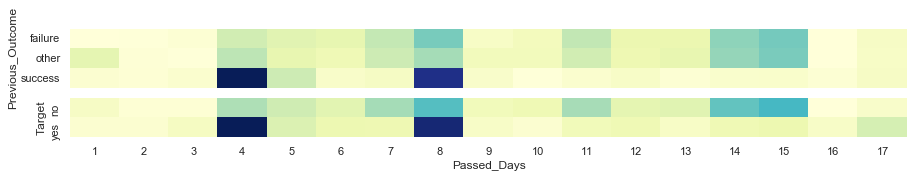

In [13]:
df_PD_PO = pd.crosstab(df[df.Passed_Days != 0]['Passed_Days'], df['Previous_Outcome'], normalize = 'columns').T
df_PD_T = pd.crosstab(df[df.Passed_Days != 0]['Passed_Days'], df['Target'], normalize = 'columns').T
f, ax = plt.subplots(2, 1, figsize = (15,2), sharex = True, squeeze=True, gridspec_kw = {'height_ratios':[3,2]})
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
sns.heatmap(df_PD_PO, cmap='YlGnBu', cbar=False, annot=False, fmt= '.2f', ax = ax[0])
ax[0].xaxis.set_visible(False)
sns.heatmap(df_PD_T, cmap='YlGnBu', cbar=False, annot=False, fmt= '.2f', ax = ax[1])
print('Previous Outcome Failure and Target Yes:', df[(df['Previous_Outcome'] == 'failure') & (df['Target'] == 'yes')]['Target'].count())
print('Previous Outcome Success and Target No:', df[(df['Previous_Outcome'] == 'success') & (df['Target'] == 'no')]['Target'].count())

* Categorising Passed days into increments of 25 with unknown or -1 as 0 and capping max value at 400 to treat outliers
* Passed days appears to have good relation with Previous Outcome as well as Target if unknowns are skipped
* Contacts between 75 to 100 and 175 to 200 passed days appears to have 50% of conversions

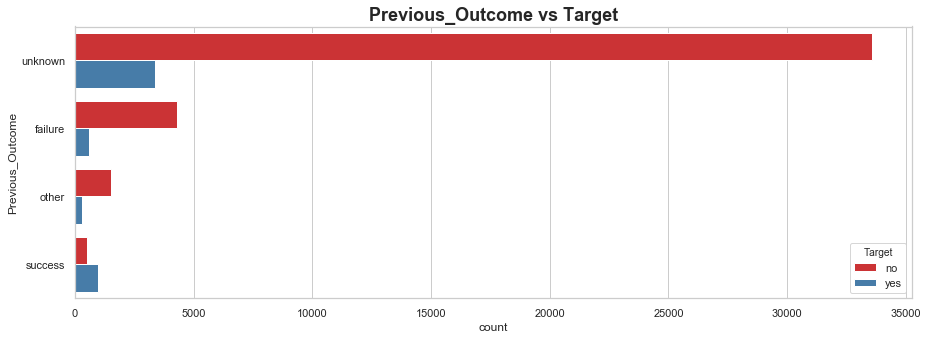

In [14]:
plt.figure(figsize=(15,5))
plt.title("Previous_Outcome vs Target", size = 18, weight = "bold")
sns.countplot(y='Previous_Outcome', order = df.Previous_Outcome.value_counts().index, hue = 'Target', data=df)

Distribution of Contact Date


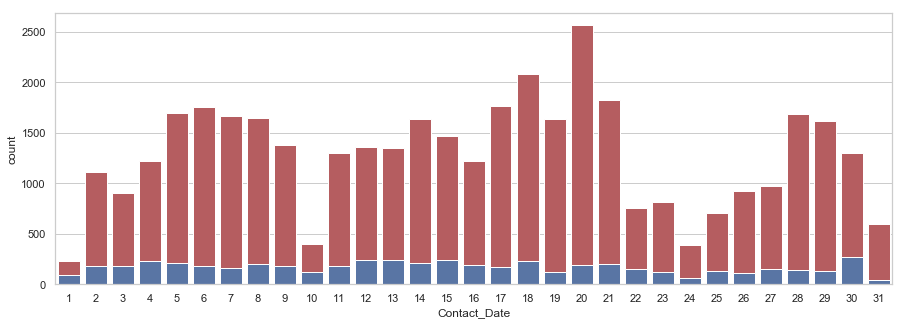

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(df[df.Target == 'no']['Contact_Date'], color='r')
sns.countplot(df[df.Target == 'yes']['Contact_Date'], color='b')
print('Distribution of Contact Date')

Distribution of Contact Month


Contact_Month       apr      aug      dec       feb       jan       jul  \
Target                                                                    
no             0.803206  0.89001  0.53271  0.833522  0.898788  0.909065   
yes            0.196794  0.10999  0.46729  0.166478  0.101212  0.090935   

Contact_Month       jun       mar       may       nov       oct       sep  
Target                                                                     
no             0.897753  0.480084  0.932805  0.898489  0.561905  0.535406  
yes            0.102247  0.519916  0.067195  0.101511  0.438095  0.464594

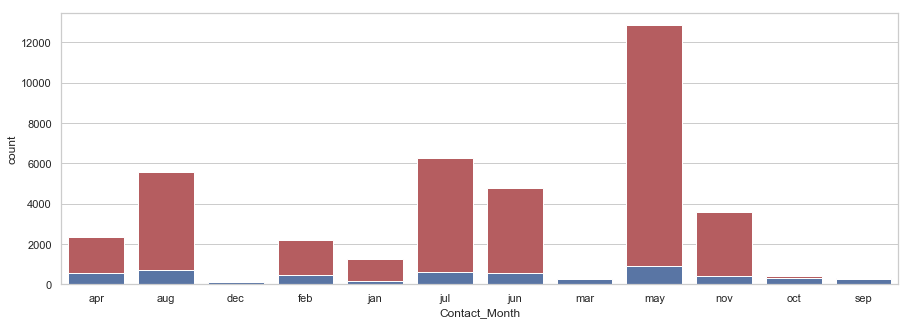

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(df[df.Target == 'no']['Contact_Month'].sort_values(), color='r')
sns.countplot(df[df.Target == 'yes']['Contact_Month'].sort_values(), color='b')
print('Distribution of Contact Month')
pd.crosstab(df['Contact_Month'], df['Target'], normalize = 'index').T

* As discussed earlier December, March, October and September appears to have conversion between 43 to 52%
* While it also has the least proportion of calls relative to other months

### Step 4 - Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc.

Distribution of Age


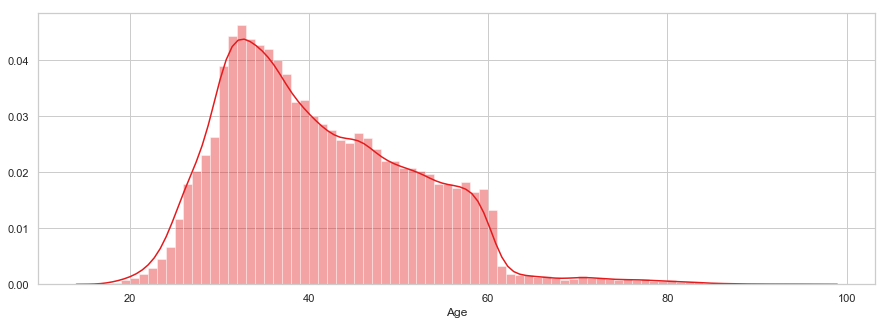

In [17]:
plt.figure(figsize=(15,5))
sns.distplot(df['Age'], bins = df.Age.nunique())
print('Distribution of Age')

Relation between Age, Job Type, Marital Status & Education


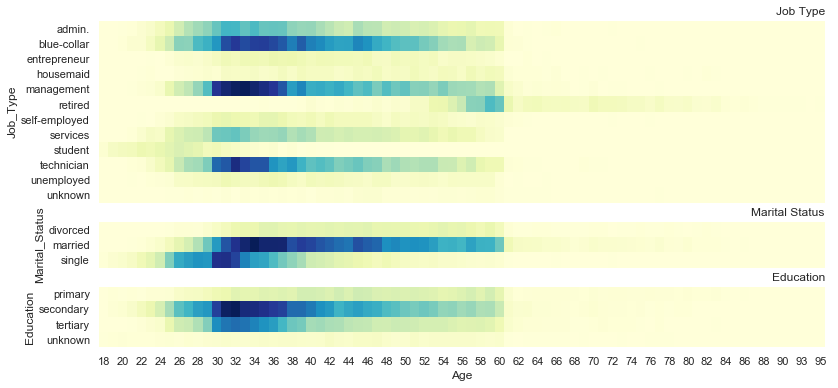

In [18]:
df_JT_A = pd.crosstab(df['Job_Type'], df['Age'])
df_MS_A = pd.crosstab(df['Marital_Status'], df['Age'])
df_E_A = pd.crosstab(df['Education'], df['Age'])
f, ax = plt.subplots(3, 1, figsize = (13,6), sharex = True, squeeze=True, gridspec_kw = {'height_ratios':[12,3,4]})
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
sns.heatmap(df_JT_A, cmap='YlGnBu', cbar=False, ax = ax[0])
ax[0].xaxis.set_visible(False)
ax[0].set_title("Job Type", size = 12, loc='right')
sns.heatmap(df_MS_A, cmap='YlGnBu', cbar=False, ax = ax[1])
ax[1].xaxis.set_visible(False)
ax[1].set_title("Marital Status", size = 12, loc='right')
sns.heatmap(df_E_A, cmap='YlGnBu',cbar=False, ax = ax[2])
ax[2].set_title("Education", size = 12, loc='right')
print('Relation between Age, Job Type, Marital Status & Education')

Age            1         2       3         4         5         6         7  \
Target                                                                       
no      0.760479  0.855235  0.8943  0.901639  0.911843  0.906412  0.906544   
yes     0.239521  0.144765  0.1057  0.098361  0.088157  0.093588  0.093456   

Age            8         9  
Target                      
no      0.891164  0.577928  
yes     0.108836  0.422072

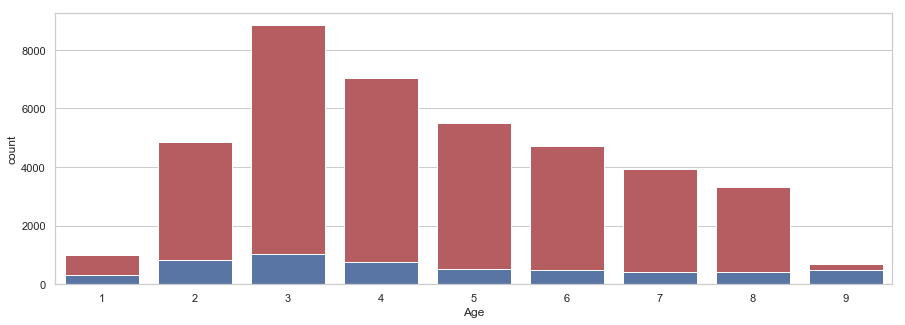

In [19]:
df.loc[(df['Age'] < 26), 'Age'] = 1
df.loc[(df['Age'] > 25) & (df['Age'] <= 30), 'Age'] = 2
df.loc[(df['Age'] > 30) & (df['Age'] <= 35), 'Age'] = 3
df.loc[(df['Age'] > 35) & (df['Age'] <= 40), 'Age'] = 4
df.loc[(df['Age'] > 40) & (df['Age'] <= 45), 'Age'] = 5
df.loc[(df['Age'] > 45) & (df['Age'] <= 50), 'Age'] = 6
df.loc[(df['Age'] > 50) & (df['Age'] <= 55), 'Age'] = 7
df.loc[(df['Age'] > 55) & (df['Age'] <= 60), 'Age'] = 8
df.loc[(df['Age'] > 60), 'Age'] = 9
plt.figure(figsize=(15,5))
sns.countplot(df[df.Target == 'no']['Age'], color='r')
sns.countplot(df[df.Target == 'yes']['Age'], color='b')
pd.crosstab(df['Age'], df['Target'], normalize = 'index').T

* Age above 60 are majorly retired
* Categorising Age into increments of 5 years and capping max value above 60 to treat outliers based on distribution in Job Type, Education and Marital Status

Distribution of Avg_Yearly_Balance


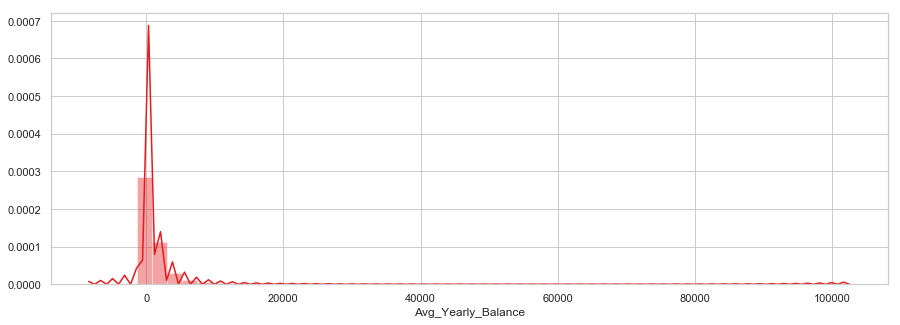

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(df['Avg_Yearly_Balance'])
print('Distribution of Avg_Yearly_Balance')

Avg_Yearly_Balance         0         1        2         3         4
Target                                                             
no                  0.931044  0.897503  0.86688  0.823281  0.844991
yes                 0.068956  0.102497  0.13312  0.176719  0.155009

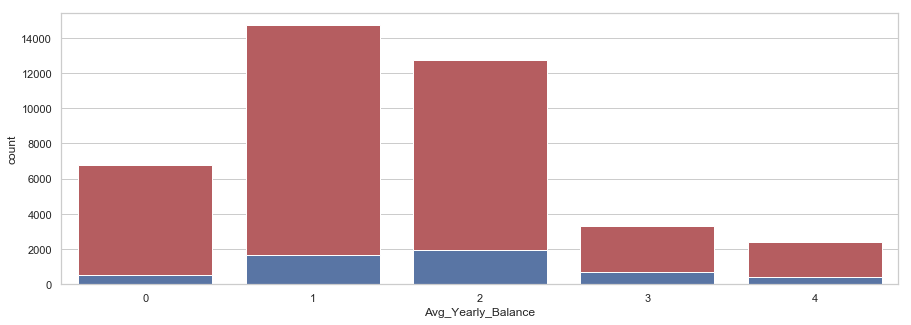

In [21]:
df.loc[(df['Avg_Yearly_Balance'] < 1), 'Avg_Yearly_Balance'] = 0
df.loc[(df['Avg_Yearly_Balance'] > 0) & (df['Avg_Yearly_Balance'] <= 500), 'Avg_Yearly_Balance'] = 1
df.loc[(df['Avg_Yearly_Balance'] > 500) & (df['Avg_Yearly_Balance'] <= 2500), 'Avg_Yearly_Balance'] = 2
df.loc[(df['Avg_Yearly_Balance'] > 2500) & (df['Avg_Yearly_Balance'] <= 5000), 'Avg_Yearly_Balance'] = 3
df.loc[(df['Avg_Yearly_Balance'] > 5000), 'Avg_Yearly_Balance'] = 4
plt.figure(figsize=(15,5))
sns.countplot(df[df.Target == 'no']['Avg_Yearly_Balance'], color='r')
sns.countplot(df[df.Target == 'yes']['Avg_Yearly_Balance'], color='b')
pd.crosstab(df['Avg_Yearly_Balance'], df['Target'], normalize = 'index').T

Relation between Avg Yearly Balance, Job Type, Marital Status & Education


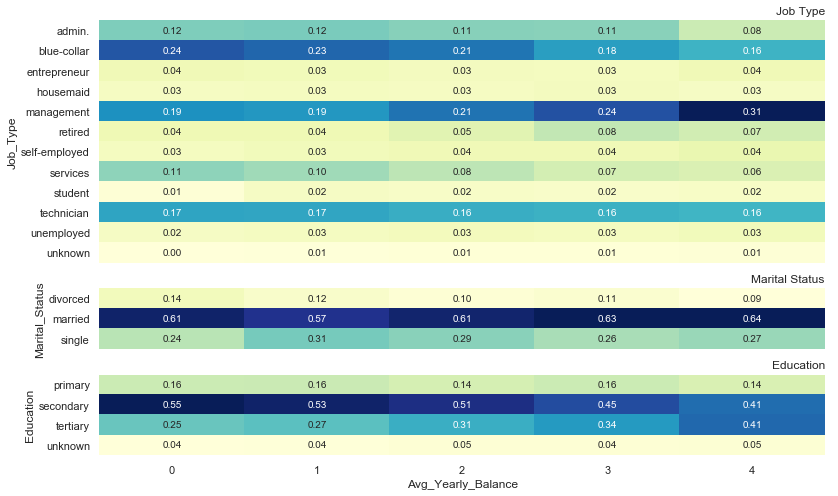

In [22]:
df_JT_AB = pd.crosstab(df['Job_Type'], df['Avg_Yearly_Balance'], normalize = 'columns')
df_MS_AB = pd.crosstab(df['Marital_Status'], df['Avg_Yearly_Balance'], normalize = 'columns')
df_E_AB = pd.crosstab(df['Education'], df['Avg_Yearly_Balance'], normalize = 'columns')
f, ax = plt.subplots(3, 1, figsize = (13,8), sharex = True, squeeze=True, gridspec_kw = {'height_ratios':[12,3,4]})
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
sns.heatmap(df_JT_AB, cmap='YlGnBu', cbar=False, annot=True, fmt= '.2f', ax = ax[0])
ax[0].xaxis.set_visible(False)
ax[0].set_title("Job Type", size = 12, loc='right')
sns.heatmap(df_MS_AB, cmap='YlGnBu', cbar=False, annot=True, fmt= '.2f', ax = ax[1])
ax[1].xaxis.set_visible(False)
ax[1].set_title("Marital Status", size = 12, loc='right')
sns.heatmap(df_E_AB, cmap='YlGnBu',cbar=False, annot=True, fmt= '.2f', ax = ax[2])
ax[2].set_title("Education", size = 12, loc='right')
print('Relation between Avg Yearly Balance, Job Type, Marital Status & Education')

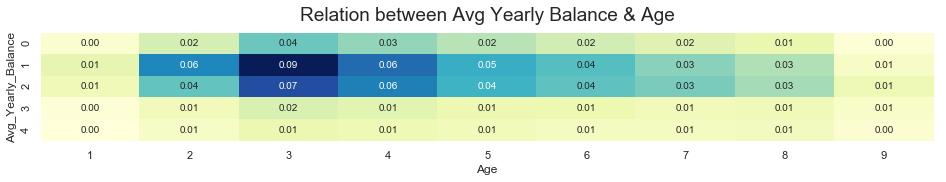

In [23]:
plt.figure(figsize=(16,2))
plt.title('Relation between Avg Yearly Balance & Age', y=1.05, size=19)
df_AB_A = pd.crosstab(df['Avg_Yearly_Balance'], df['Age'], normalize = True)
sns.heatmap(df_AB_A, cmap='YlGnBu', cbar=False, annot=True, fmt= '.2f')

* Negative Average Yearly Balance values has been capped at 0
* Values above €5000 is also capped
* All these values has been categorised into 5 buckets
* Majority of the Average Yearly balance is concentrated in the Age group between 30 to 35
* Majority of the clients maintain Average Yearly Balance between €1 to €500 and €500 to €2500
* 31% of clients maintaining Average Yearly Balance above €5000 have Job Type as Management
* In general clients with Job Type as Management maintain relatively more Average Yearly Balance

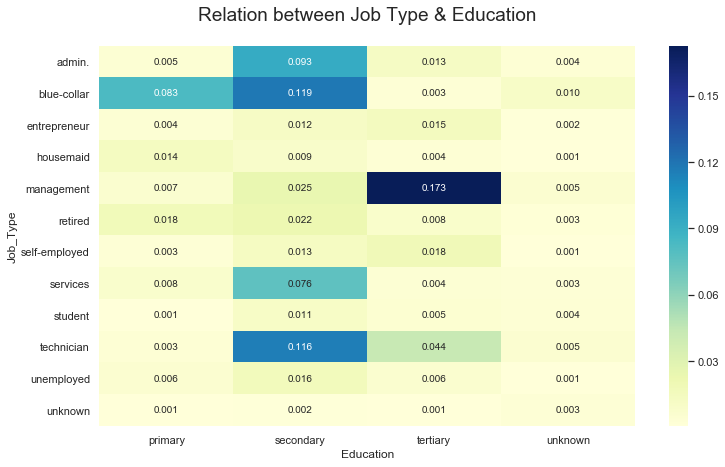

In [24]:
plt.figure(figsize=(12,7))
plt.title('Relation between Job Type & Education', y=1.05, size=19)
df_JT_E = pd.crosstab(df['Job_Type'], df['Education'], normalize = True)
sns.heatmap(df_JT_E, cmap='YlGnBu', annot=True, fmt= '.3f')

* 17% of clients has Job Type as Management and completed Tertiary education
* 20% of clients has Job Type as Blue Collar and have either completed Primary or Secondary education
* 12% of clients has Job Type as Technician and has completed Secondary education
* 9% of clients has Job Type as Admin and has completed Secondary education
* 7% of clients has Job Type as Services and has completed Secondary education

Job Type - Unknown (Before): 288
Education - Unknown (Before): 1857
Job Type - Unknown (After): 246
Education - Unknown (After): 972


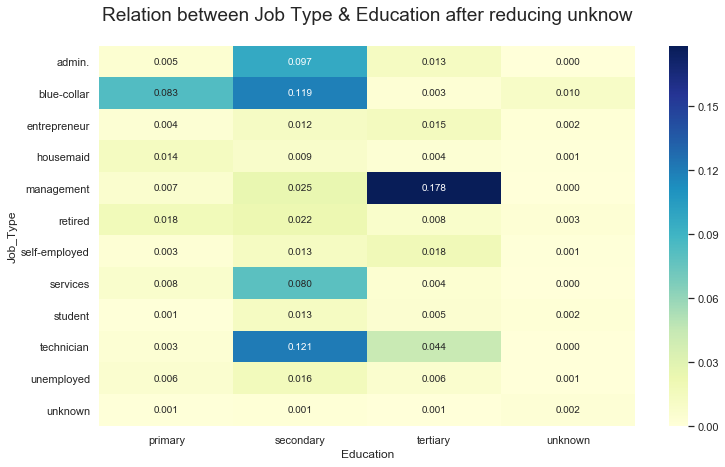

In [25]:
print('Job Type - Unknown (Before):', df.Job_Type[df.Job_Type == 'unknown'].count())
print('Education - Unknown (Before):', df.Education[df.Education == 'unknown'].count())
df.loc[(df['Age'] == 9) & (df['Job_Type'] == 'unknown'), 'Job_Type'] = 'retired'
df.loc[(df['Age'] == 1) & (df['Job_Type'] == 'unknown'), 'Job_Type'] = 'student'
df.loc[(df['Age'] == 1) & (df['Education'] == 'unknown') & (df['Job_Type'] == 'student'), 'Education'] = 'secondary'
df.loc[(df['Avg_Yearly_Balance'] == 4) & (df['Education'] != 'primary') & (df['Job_Type'] == 'unknown'), 'Job_Type'] = 'management'
df.loc[(df['Education'] == 'unknown') & (df['Job_Type'] == 'admin.'), 'Education'] = 'secondary'
df.loc[(df['Education'] == 'unknown') & (df['Job_Type'] == 'management'), 'Education'] = 'tertiary'
df.loc[(df['Education'] == 'unknown') & (df['Job_Type'] == 'services'), 'Education'] = 'secondary'
df.loc[(df['Education'] == 'unknown') & (df['Job_Type'] == 'technician'), 'Education'] = 'secondary'
plt.figure(figsize=(12,7))
plt.title('Relation between Job Type & Education after reducing unknow', y=1.05, size=19)
df_JT_E = pd.crosstab(df['Job_Type'], df['Education'], normalize = True)
sns.heatmap(df_JT_E, cmap='YlGnBu', annot=True, fmt= '.3f')
print('Job Type - Unknown (After):', df.Job_Type[df.Job_Type == 'unknown'].count())
print('Education - Unknown (After):', df.Education[df.Education == 'unknown'].count())

* Based on the inference till now replacing unknown values with maximum values in Job Type and Education

In [26]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].unique())
        df[col] = pd.Categorical(df[col])

Job_Type ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital_Status ['married' 'single' 'divorced']
Education ['tertiary' 'secondary' 'unknown' 'primary']
Credit_Default ['no' 'yes']
Housing_Loan ['yes' 'no']
Personal_Loan ['no' 'yes']
Contact_Type ['unknown' 'cellular' 'telephone']
Contact_Month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Previous_Outcome ['unknown' 'failure' 'other' 'success']
Target ['no' 'yes']


In [27]:
replaceStruct = {
                "Marital_Status": {'single': 1, 'married': 2 ,'divorced': 3},
                "Education": {'primary': 1, 'secondary':2 , 'tertiary': 3, 'unknown': -1},
                "Credit_Default": {'no':0, 'yes':1},
                "Housing_Loan": {'no':0, 'yes':1},
                "Personal_Loan": {'no':0, 'yes':1},
                "Contact_Month": {'jan': 1, 'feb': 2 , 'mar': 3, 'apr': 4,'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12},
                "Target": {'no':0, 'yes':1}
                    }
oneHotCols=["Job_Type", "Contact_Type", "Previous_Outcome"]

* Converting objects or strings to numerical attributes
* Ordinal or Binary variables are replaced with order values and nominal values are converted to One Hot Encodings

In [28]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
print(df.shape)
df.head(10)

(45206, 32)


Age  Marital_Status  Education  Credit_Default  Avg_Yearly_Balance  \
0    8               2          3               0                   2   
1    5               1          2               0                   1   
2    3               2          2               0                   1   
3    6               2         -1               0                   2   
4    3               1         -1               0                   1   
5    3               2          3               0                   1   
6    2               1          3               0                   1   
7    5               3          3               1                   1   
8    8               2          1               0                   1   
9    5               1          2               0                   2   

   Housing_Loan  Personal_Loan  Contact_Date  Contact_Month  \
0             1              0             5              5   
1             1              0             5              5   
2             1              1             5              5   
3             1              0             5              5   
4             0              0             5              5   
5             1              0             5              5   
6             1              1             5              5   
7             1              0             5              5   
8             1              0             5              5   
9             1              0             5              5   

   Campaign_Contacts  ...  Job_Type_technician  Job_Type_unemployed  \
0                  1  ...                    0                    0   
1                  1  ...                    1                    0   
2                  1  ...                    0                    0   
3                  1  ...                    0                    0   
4                  1  ...                    0                    0   
5                  1  ...                    0                    0   
6                  1  ...                    0                    0   
7                  1  ...                    0                    0   
8                  1  ...                    0                    0   
9                  1  ...                    1                    0   

   Job_Type_unknown  Contact_Type_cellular  Contact_Type_telephone  \
0                 0                      0                       0   
1                 0                      0                       0   
2                 0                      0                       0   
3                 0                      0                       0   
4                 1                      0                       0   
5                 0                      0                       0   
6                 0                      0                       0   
7                 0                      0                       0   
8                 0                      0                       0   
9                 0                      0                       0   

   Contact_Type_unknown  Previous_Outcome_failure  Previous_Outcome_other  \
0                     1                         0                       0   
1                     1                         0                       0   
2                     1                         0                       0   
3                     1                         0                       0   
4                     1                         0                       0   
5                     1                         0                       0   
6                     1                         0                       0   
7                     1                         0                       0   
8                     1                         0                       0   
9                     1                         0                       0   

   Previous_Outcome_success  Previous_Outcome_unknown  
0                         0                     

In [29]:
df.drop(columns= ['Job_Type_unknown', 'Contact_Type_unknown', 'Previous_Outcome_unknown'], inplace=True) 
print(df.shape)
df.head()

(45206, 29)


Age  Marital_Status  Education  Credit_Default  Avg_Yearly_Balance  \
0    8               2          3               0                   2   
1    5               1          2               0                   1   
2    3               2          2               0                   1   
3    6               2         -1               0                   2   
4    3               1         -1               0                   1   

   Housing_Loan  Personal_Loan  Contact_Date  Contact_Month  \
0             1              0             5              5   
1             1              0             5              5   
2             1              1             5              5   
3             1              0             5              5   
4             0              0             5              5   

   Campaign_Contacts  ...  Job_Type_self-employed  Job_Type_services  \
0                  1  ...                       0                  0   
1                  1  ...                       0                  0   
2                  1  ...                       0                  0   
3                  1  ...                       0                  0   
4                  1  ...                       0                  0   

   Job_Type_student  Job_Type_technician  Job_Type_unemployed  \
0                 0                    0                    0   
1                 0                    1                    0   
2                 0                    0                    0   
3                 0                    0                    0   
4                 0                    0                    0   

   Contact_Type_cellular  Contact_Type_telephone  Previous_Outcome_failure  \
0                      0                       0                         0   
1                      0                       0                         0   
2                      0                       0                         0   
3                      0                       0                         0   
4                      0                       0                         0   

   Previous_Outcome_other  Previous_Outcome_success  
0                       0                         0  
1                       0                         0  
2                       0                         0  
3                       0                         0  
4                       0                         0  

[5 rows x 29 columns]

* Dropping unknown hot encodings of variables Job Type, Contact Type & Previous Outcome as they are redundant

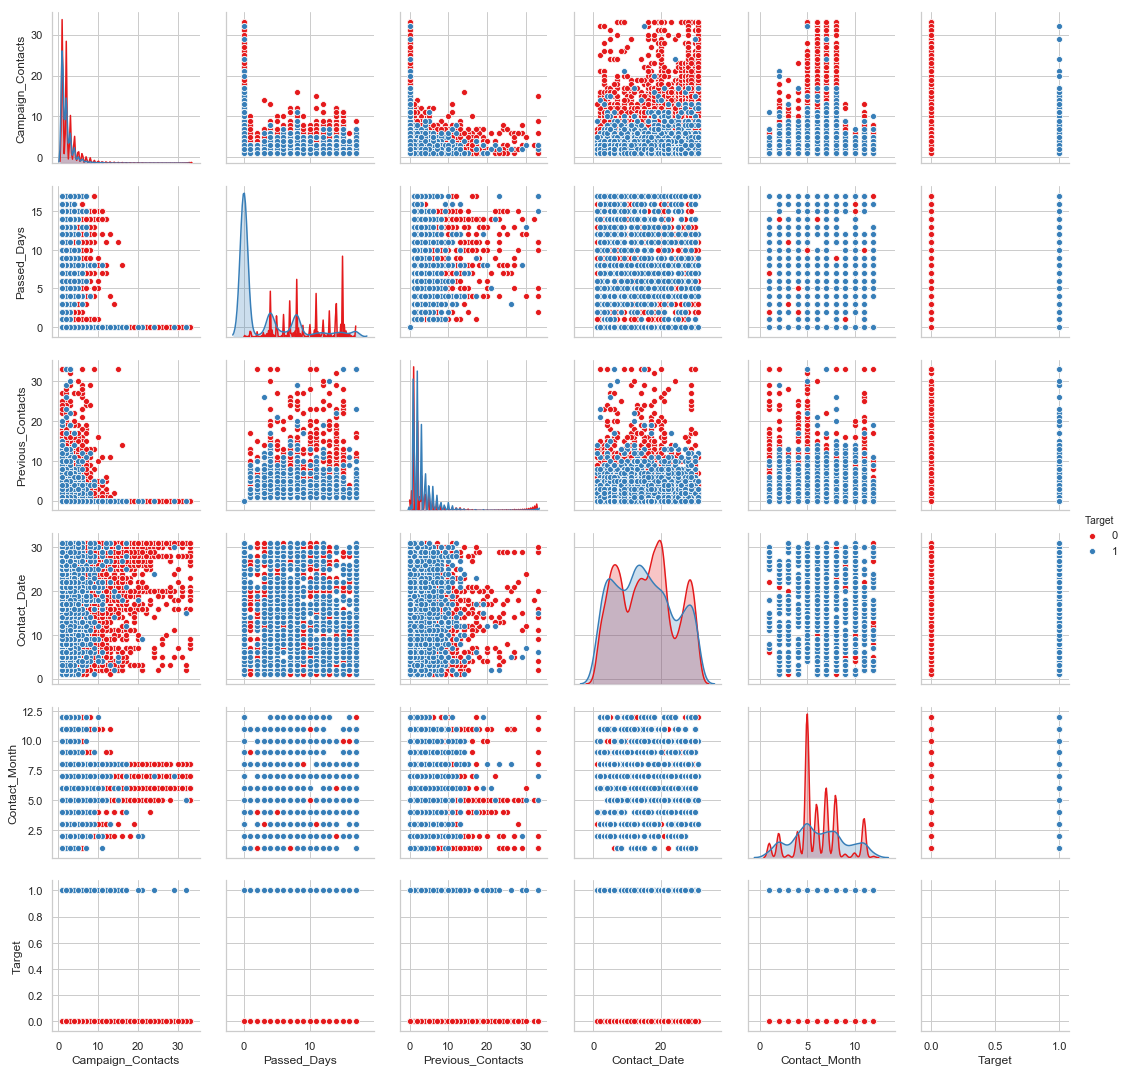

In [30]:
sns.pairplot(df[['Campaign_Contacts', 'Passed_Days', 'Previous_Contacts', 'Contact_Date', 'Contact_Month', 'Target']], hue = 'Target')

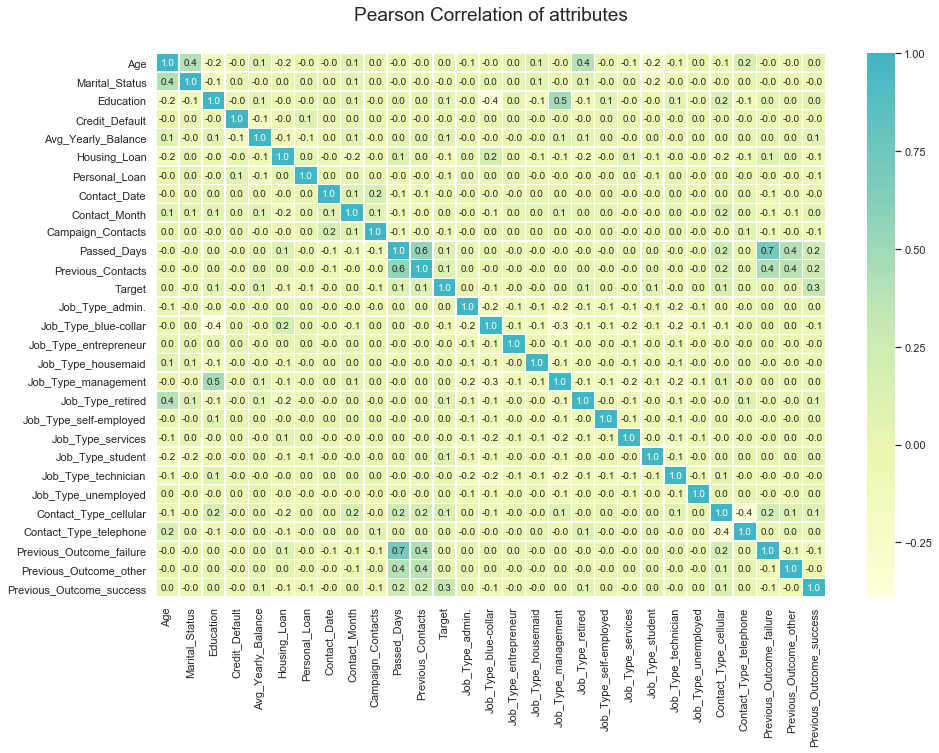

In [31]:
corr = df.corr()
plt.figure(figsize=(15, 10))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(corr, cmap='YlGnBu', annot=True, linewidths=.5, fmt= '.1f', center = 1)

#### Pearson correlation ####
- Target and Previous Outcome Success has a Pearson correlation (ρ = 0.3)
- Passed days and Previous Outcome Failure has a high Pearson correlation (ρ = 0.7)
- Passed days and Previous Contacts has a Pearson correlation (ρ = 0.6)
- Job Type Management and Education has a Pearson correlation (ρ = 0.5)
- Job Type Blue Collar and Education has a negative Pearson correlation (ρ = -0.4)
- Age and Marital Status has a Pearson correlation (ρ = 0.4)
- Age and Job Type Retired has a Pearson correlation (ρ = 0.4)
- Previous Contacts with Previous Outcome Failure and Previous Outcome Other has a Pearson correlation (ρ = 0.4)
- Passed days and Previous Outcome Other has a high Pearson correlation (ρ = 0.4)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, recall_score, precision_score

In [33]:
X = df.drop(['Target'], axis=1)
y = df[['Target']]
X_train, X_test_o, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [34]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test_o)
y_train = np.array(y_train)
y_test = np.array(y_test)

- Data is split into 70:30 ratio for training and testing.
- It has also been normalised by scaling between 0 and 1 to compensate for unit errors.

### Step 5 - Train a few standard classification algorithms, note and comment on their performances across different classification metrics.

#### Logistic Regression ###

In [35]:
# Please upgrade scikit-learn to latest version: 0.22.1
# Required for regularization using "elasticnet"; A combination of Ridge Regression and Lasso Regression
# pip install -U scikit-learn
from sklearn.linear_model import LogisticRegression

In [36]:
LR_model = LogisticRegression(solver = "saga", penalty = "elasticnet", l1_ratio = 1, n_jobs = -1)
LR_model.fit(X_train, y_train.ravel())

LR_y_predict_train = LR_model.predict(X_train)
LR_y_predict_test = LR_model.predict(X_test)

print("*** Logistic Regression ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, LR_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, LR_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, LR_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, LR_y_predict_test)))
print(classification_report(y_test, LR_y_predict_test, labels=[1, 0]))

*** Logistic Regression ***
Model Accuracy in-sample: 0.8929
Model Accuracy out of sample: 0.8933
Model Recall in-sample: 0.1562
Model Recall out of sample: 0.1786
              precision    recall  f1-score   support

           1       0.72      0.18      0.29      1624
           0       0.90      0.99      0.94     11938

    accuracy                           0.89     13562
   macro avg       0.81      0.58      0.61     13562
weighted avg       0.88      0.89      0.86     13562



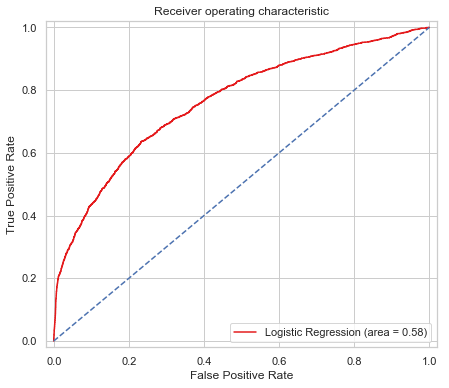

In [37]:
LR_roc_auc = roc_auc_score(y_test, LR_model.predict(X_test))
LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(7, 6))
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression (area = %0.2f)' % LR_roc_auc)
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

- TP = Actual 1 & Predicted 1 | TN = Actual 0 & Predicted 0 | FP = Actual 0 & Predicted 1 | FN = Actual 1 & Predicted 0
- Bank will lose out on potential customers if FN is high, while it will have to spend extra budget to campaign if FP is high.
- It is more important to measure out of all positives, what fraction was identified.
- Ideally both FN & FP should be least, but in this case we can prefer FN over FP as that will minimise losing out on potential customers.
- This assumption is being considered as the business decision throughout the project.
- Accuracy = ${\dfrac {TP + TN} {TP + TN + FP + FN}}$ | Recall Score or TPR = ${\dfrac {TP} {TP + FN}}$ | FPR = ${\dfrac {FP} {FP + TN}}$ | Precision Score = ${\dfrac {TP} {TP + FP}}$
- Objective is to have higher 'Recall Score' without losing out much on 'Accuracy' or 'Precision Score'.

In [38]:
df_LR_ROC = pd.DataFrame(list(zip(thresholds,LR_fpr,LR_tpr)), columns =['Thresholds','LR_FPR','LR_TPR'])
df_LR_ROC[(df_LR_ROC.LR_TPR > 0.75) & (df_LR_ROC.LR_FPR < 0.4)]

Thresholds    LR_FPR    LR_TPR
1920    0.090607  0.446641  0.800493
1921    0.090591  0.446725  0.800493
1922    0.090560  0.446725  0.801724
1923    0.090478  0.447562  0.801724
1924    0.090476  0.447562  0.802340
1925    0.090287  0.448568  0.802340
1926    0.090276  0.448568  0.802956
1927    0.089910  0.451583  0.802956
1928    0.089876  0.451583  0.803571
1929    0.089645  0.453426  0.803571
1930    0.089633  0.453426  0.804187
1931    0.089477  0.455269  0.804187
1932    0.089476  0.455269  0.804803
1933    0.089436  0.455939  0.804803
1934    0.089436  0.456023  0.805419
1935    0.089400  0.456609  0.805419
1936    0.089396  0.456609  0.806034
1937    0.089313  0.457112  0.806034
1938    0.089307  0.457112  0.806650
1939    0.089132  0.457866  0.806650
1940    0.089127  0.458033  0.806650
1941    0.088956  0.459457  0.806650
1942    0.088944  0.459457  0.807266
1943    0.088909  0.459792  0.807266
1944    0.088898  0.459792  0.808498
1945    0.088688  0.460965  0.808498
1946    0.088677  0.460965  0.809729
1947    0.088582  0.461384  0.809729
1948    0.088578  0.461384  0.810345
1949    0.088558  0.461551  0.810345
...          ...       ...       ...
2019    0.083850  0.495225  0.830049
2020    0.083847  0.495225  0.830665
2021    0.083471  0.497571  0.830665
2022    0.083471  0.497655  0.831281
2023    0.083427  0.497822  0.831281
2024    0.083420  0.497822  0.831897
2025    0.083291  0.499079  0.831897
2026    0.083285  0.499246  0.831897
2027    0.083069  0.500586  0.831897
2028    0.083042  0.500586  0.832512
2029    0.082882  0.501508  0.832512
2030    0.082862  0.501508  0.834360
2031    0.082813  0.501759  0.834360
2032    0.082811  0.501759  0.834975
2033    0.082728  0.502429  0.834975
2034    0.082696  0.502429  0.835591
2035    0.082394  0.505110  0.835591
2036    0.082374  0.505110  0.836207
2037    0.082373  0.505277  0.836207
2038    0.082043  0.506785  0.836207
2039    0.082041  0.506785  0.836823
2040    0.081981  0.507288  0.836823
2041    0.081980  0.507455  0.836823
2042    0.081980  0.507455  0.837438
2043    0.081704  0.509633  0.837438
2044    0.081691  0.509633  0.838054
2045    0.081664  0.509801  0.838054
2046    0.081649  0.509801  0.838670
2047    0.081646  0.509884  0.838670
2048    0.081639  0.509884  0.839286

[129 rows x 3 columns]

- Table shows possible 'Thresholds' to be considered to keep TPR above 0.75

 A)  Accuracy Score:  0.8933    | Recall Score:  0.1786   | Precision Score:  0.7196 
 B)  Accuracy Score:  0.5392  | Recall Score:  0.8319  | Precision Score:  0.1844 
 C)  Accuracy Score:  0.6302  | Recall Score:  0.7562  | Precision Score:  0.21


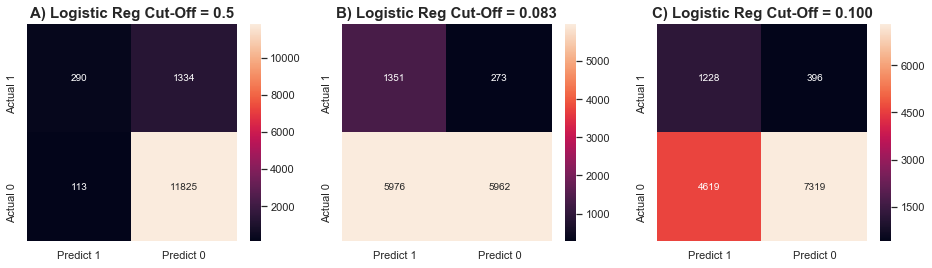

In [39]:
LR_cm =confusion_matrix(y_test, LR_y_predict_test, labels=[1, 0])
LR_df_cm = pd.DataFrame(LR_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

max_thr = np.argmax(LR_fpr*(1-LR_fpr))
Optimal_Threshold = thresholds[max_thr]
LR_y_predict_test_ot = (LR_model.predict_proba(X_test)[:,1] >= Optimal_Threshold)
LR_cm_ot = confusion_matrix(y_test, LR_y_predict_test_ot, labels=[1, 0])
LR_df_cm_ot = pd.DataFrame(LR_cm_ot, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

Threshold = 0.1 # Set threshold
LR_y_predict_test_t = (LR_model.predict_proba(X_test)[:,1] >= Threshold)
LR_cm_t = confusion_matrix(y_test, LR_y_predict_test_t, labels=[1, 0])
LR_df_cm_t = pd.DataFrame(LR_cm_t, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

f, ax = plt.subplots(1, 3, figsize = (16,4))
sns.heatmap(LR_df_cm, annot=True, fmt = 'g', ax = ax[0])
ax[0].set_title("A) Logistic Reg Cut-Off = 0.5", size = 15, weight = "bold")
sns.heatmap(LR_df_cm_ot, annot=True, fmt = 'g', ax = ax[1])
ax[1].set_title("B) Logistic Reg Cut-Off = %0.3f"% Optimal_Threshold, size = 15, weight = "bold")
sns.heatmap(LR_df_cm_t, annot=True, fmt = 'g', ax = ax[2])
ax[2].set_title("C) Logistic Reg Cut-Off = %0.3f"% Threshold, size = 15, weight = "bold")

print(" A) ", "Accuracy Score: ", round(accuracy_score(y_test, LR_y_predict_test), 4), "   | Recall Score: ", round(recall_score(y_test, LR_y_predict_test), 4), "  | Precision Score: ", round(precision_score(y_test, LR_y_predict_test), 4), "\n",
"B) ", "Accuracy Score: ", round(accuracy_score(y_test, LR_y_predict_test_ot), 4), " | Recall Score: ", round(recall_score(y_test, LR_y_predict_test_ot), 4), " | Precision Score: ", round(precision_score(y_test, LR_y_predict_test_ot), 4), "\n",
"C) ", "Accuracy Score: ", round(accuracy_score(y_test, LR_y_predict_test_t),4), " | Recall Score: ", round(recall_score(y_test, LR_y_predict_test_t),4), " | Precision Score: ", round(precision_score(y_test, LR_y_predict_test_t),4))

- Comparing confusion matrix with different threshold values of 0.5, 0.083 (Best Recall) and 0.1 (Optimised).
- Choosing Cut-off of 0.1 as optimum threshold based on good recall score (0.75), without losing much of Accuracy, while loosing Precision which might increase the campaign cost.

#### K-Nearest Neighbors ###

In [40]:
from sklearn.neighbors import KNeighborsClassifier

The optimal number of Neighbours is 37


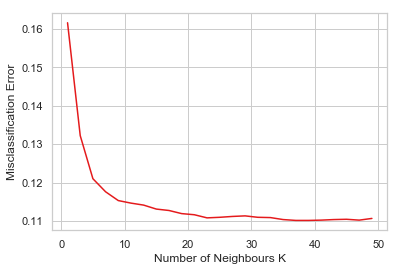

In [41]:
scores =[]
K_lim = 50
for k in range(1,K_lim,2):
    KNN_model = KNeighborsClassifier(n_neighbors = k, weights = 'distance', n_jobs = -1)
    KNN_model.fit(X_train, y_train.ravel())
    scores.append(KNN_model.score(X_test, y_test.ravel()))
neighbors = list(range(1, K_lim, 2))
#plt.plot(neighbors, scores)
MSE = [1 - x for x in scores] # changing to misclassification error
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of Neighbours is %d" % optimal_k)

plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbours K')
plt.ylabel('Misclassification Error')
plt.show()

In [42]:
KNN_model = KNeighborsClassifier(n_neighbors= 39 , weights = 'distance', n_jobs = -1)
KNN_model.fit(X_train, y_train.ravel())

KNN_y_predict_train = KNN_model.predict(X_train)
KNN_y_predict_test = KNN_model.predict(X_test)

print("*** K-Nearest Neighbours ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, KNN_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, KNN_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, KNN_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, KNN_y_predict_test)))
print(classification_report(y_test, KNN_y_predict_test, labels=[1, 0]))

*** K-Nearest Neighbours ***
Model Accuracy in-sample: 0.9961
Model Accuracy out of sample: 0.8898
Model Recall in-sample: 0.9675
Model Recall out of sample: 0.1736
              precision    recall  f1-score   support

           1       0.65      0.17      0.27      1624
           0       0.90      0.99      0.94     11938

    accuracy                           0.89     13562
   macro avg       0.77      0.58      0.61     13562
weighted avg       0.87      0.89      0.86     13562



- Optimising K with values between 1 and 50 with a step of 2 to identify clear majority
- Choosing K of 37 based on Misclassification Error
- Model appears to be overfit for Recall Score as out of sample recall score is 0.17 relative to 0.96

#### Naive Bayes ###

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Target'] == 1]), (len(df.loc[df['Target'] == 1])/len(df.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Target'] == 0]), (len(df.loc[df['Target'] == 0])/len(df.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 5287 (11.70%)
Original Target False Values   : 39919 (88.30%)

Training Target True Values    : 3663 (11.58%)
Training Target False Values   : 27981 (88.42%)

Test Target True Values        : 1624 (11.97%)
Test Target False Values       : 11938 (88.03%)



- Target 1 class has only 12% representation
- This may not support an unbiased model

In [45]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train.ravel())

NB_y_predict_train = NB_model.predict(X_train)
NB_y_predict_test = NB_model.predict(X_test)

print("*** Naive Bayes ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, NB_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, NB_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, NB_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, NB_y_predict_test)))
print(classification_report(y_test, NB_y_predict_test, labels=[1, 0]))

*** Naive Bayes ***
Model Accuracy in-sample: 0.8152
Model Accuracy out of sample: 0.8149
Model Recall in-sample: 0.3836
Model Recall out of sample: 0.4058
              precision    recall  f1-score   support

           1       0.30      0.41      0.34      1624
           0       0.92      0.87      0.89     11938

    accuracy                           0.81     13562
   macro avg       0.61      0.64      0.62     13562
weighted avg       0.84      0.81      0.83     13562



- Naive Bayes appears to be doing better than KNN with an out of sample Recall Score of 0.41

#### Support Vector Machine ###

In [46]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV

In [47]:
# SVM_model = svm.SVC() 
# grid_values = [{'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['linear']},
#               {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]},
#               {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0], 'degree':[1,2,3,4,5]},
#               {'C': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,1.2,1.5,1.7,1.8,1.9,2,2.3,2.6], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]}]

# Random_model_acc = RandomizedSearchCV(SVM_model, param_distributions = grid_values, scoring='recall') #n_jobs = -1
# Random_model_acc.fit(X_train, y_train.ravel())

# SVM_y_predict_train = Random_model_acc.predict(X_train)
# SVM_y_predict_test = Random_model_acc.predict(X_test)

# print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, SVM_y_predict_train)))
# print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, SVM_y_predict_test)))
# print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, SVM_y_predict_train)))
# print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, SVM_y_predict_test)))
# Random_model_acc.best_params_

In [48]:
SVM_model = svm.SVC(kernel = 'poly', gamma = 0.9, degree = 5, C = 1) # parameters picked after iterations in Random Search
SVM_model.fit(X_train , y_train.ravel())

SVM_y_predict_train = SVM_model.predict(X_train)
SVM_y_predict_test = SVM_model.predict(X_test)

print("*** Support Vector Machine ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, SVM_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, SVM_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, SVM_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, SVM_y_predict_test)))
print(classification_report(y_test, SVM_y_predict_test, labels=[1, 0]))

*** Support Vector Machine ***
Model Accuracy in-sample: 0.9358
Model Accuracy out of sample: 0.8694
Model Recall in-sample: 0.4737
Model Recall out of sample: 0.2432
              precision    recall  f1-score   support

           1       0.42      0.24      0.31      1624
           0       0.90      0.95      0.93     11938

    accuracy                           0.87     13562
   macro avg       0.66      0.60      0.62     13562
weighted avg       0.85      0.87      0.85     13562



- Results after optimising parameters of SVM using Randomized Search Cross Validation for better out of sample recall score.

#### Decision Tree Classifier ####

In [49]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [50]:
# DT_model = tree.DecisionTreeClassifier()
# grid_values = {'criterion':['gini','entropy'], 'splitter':['best', 'random'], 'max_depth':[1,2,3,4,5,6,7,8,9]}
 
# grid_model_acc = GridSearchCV(DT_model, param_grid = grid_values, scoring='recall') #n_jobs = -1, 
# grid_model_acc.fit(X_train, y_train.ravel())

# DT_y_predict_train = grid_model_acc.predict(X_train)
# DT_y_predict_test = grid_model_acc.predict(X_test)

# print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, DT_y_predict_train)))
# print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, DT_y_predict_test)))
# print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, DT_y_predict_train)))
# print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, DT_y_predict_test)))
# grid_model_acc.best_estimator_

In [51]:
DT_model = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
DT_model.fit(X_train, y_train.ravel())

DT_y_predict_train = DT_model.predict(X_train)
DT_y_predict_test = DT_model.predict(X_test)

print("*** Decision Tree Classifier ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, DT_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, DT_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, DT_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, DT_y_predict_test)))
print(classification_report(y_test, DT_y_predict_test, labels=[1, 0]))

*** Decision Tree Classifier ***
Model Accuracy in-sample: 0.9031
Model Accuracy out of sample: 0.8888
Model Recall in-sample: 0.2981
Model Recall out of sample: 0.2666
              precision    recall  f1-score   support

           1       0.58      0.27      0.36      1624
           0       0.91      0.97      0.94     11938

    accuracy                           0.89     13562
   macro avg       0.74      0.62      0.65     13562
weighted avg       0.87      0.89      0.87     13562



- Results after optimising parameters of Decision Tree Classifier using Grid Search Cross Validation.
- In sample and out of sample Recall Score appears to be close 0.29 & 0.26
- Hence leaving max depth as 9 itself

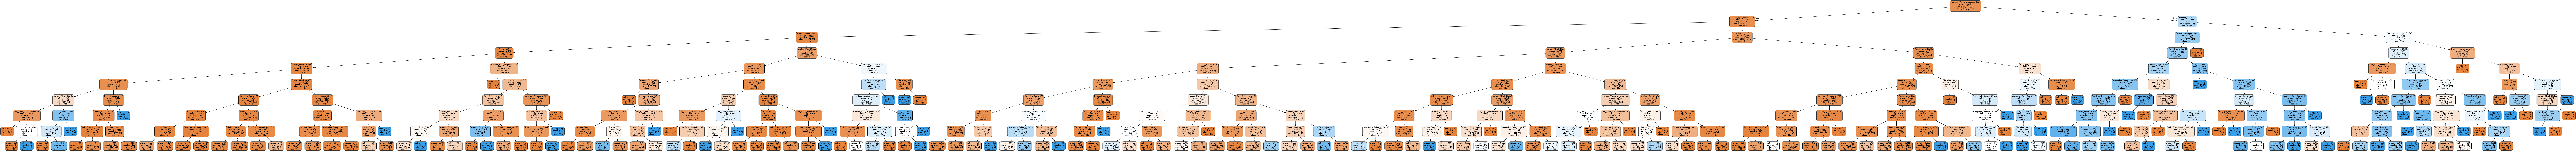

In [53]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
dot_data = StringIO() 
features = X.columns
classes = ['No', 'Yes']
tree.export_graphviz(DT_model, out_file=dot_data, feature_names=features, class_names=classes, filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Previous_Outcome_success  Contact_Month  Contact_Date  \
Importance                  0.299289       0.211277      0.118054   

            Contact_Type_cellular  Passed_Days  Housing_Loan       Age  \
Importance               0.076816     0.074608      0.051155  0.049537   

            Campaign_Contacts  Previous_Contacts  Marital_Status  ...  \
Importance           0.026554           0.014629        0.012372  ...   

            Job_Type_retired  Job_Type_technician  Job_Type_admin.  \
Importance          0.002916             0.002175          0.00212   

            Job_Type_housemaid  Job_Type_self-employed  \
Importance            0.002018                0.002004   

            Previous_Outcome_failure  Job_Type_entrepreneur  \
Importance                  0.001681               0.001369   

            Job_Type_services  Credit_Default  Previous_Outcome_other  
Importance           0.001344             0.0                     0.0  

[1 rows x 28 columns]

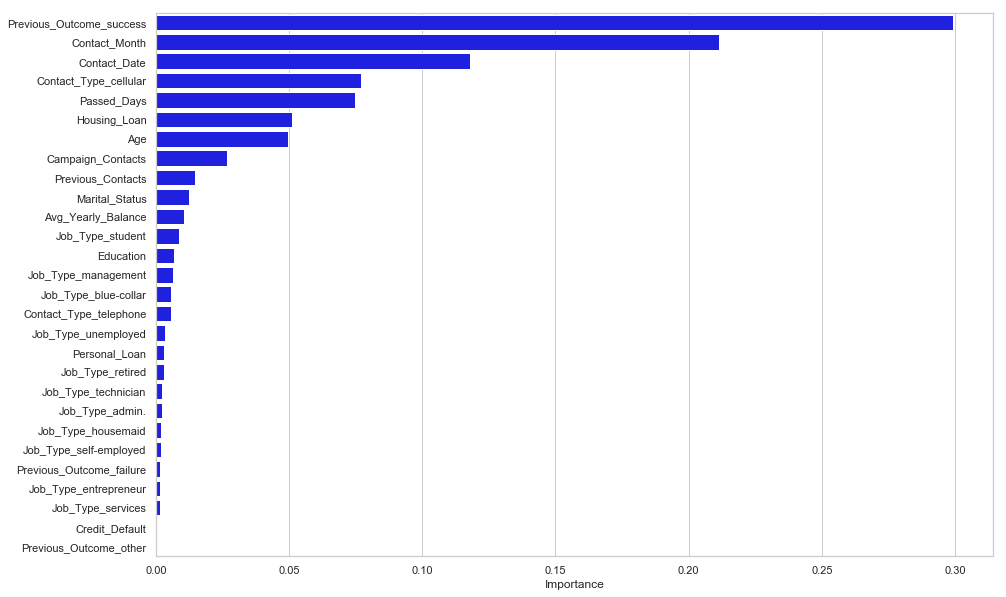

In [54]:
df_importance = pd.DataFrame(DT_model.feature_importances_, columns = ["Importance"], index = features).sort_values(by = "Importance", ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x = df_importance["Importance"], y = df_importance.index, orient='h', color = "blue")
df_importance.T

- Previous Outcome Success appears to be playing an important role (0.3) in Decision Tree
- It also has a Pearson correlation (ρ = 0.3) with Target
- Previous Outcome also has an unknown of 36954 out of 45211 (81.7%)
- This could be a major reason for poor performance of Recall Score of Target class 1

### Step 6 - Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees.

#### Random Forest Classifier ####

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
RF_model = RandomForestClassifier(n_estimators = 600)
RF_model.fit(X_train, y_train.ravel())

RF_y_predict_train = RF_model.predict(X_train)
RF_y_predict_test = RF_model.predict(X_test)

print("*** Random Forest ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, RF_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, RF_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, RF_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, RF_y_predict_test)))
print(classification_report(y_test, RF_y_predict_test, labels=[1, 0]))

*** Random Forest ***
Model Accuracy in-sample: 0.9961
Model Accuracy out of sample: 0.8909
Model Recall in-sample: 0.9686
Model Recall out of sample: 0.2358
              precision    recall  f1-score   support

           1       0.62      0.24      0.34      1624
           0       0.90      0.98      0.94     11938

    accuracy                           0.89     13562
   macro avg       0.76      0.61      0.64     13562
weighted avg       0.87      0.89      0.87     13562



- Random Forest seems to be giving good accuracy and in sample recall score
- While the model has overfit the data to produce only out of sample recall score of 0.2358

#### Ada Boost Classifier ####

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
AB_model = AdaBoostClassifier( n_estimators= 600, learning_rate=0.1, random_state=22)
AB_model.fit(X_train, y_train.ravel())

AB_y_predict_train = AB_model.predict(X_train)
AB_y_predict_test = AB_model.predict(X_test)

print("*** Ada Boost ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, AB_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, AB_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, AB_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, AB_y_predict_test)))
print(classification_report(y_test, AB_y_predict_test, labels=[1, 0]))

*** Ada Boost ***
Model Accuracy in-sample: 0.8929
Model Accuracy out of sample: 0.8925
Model Recall in-sample: 0.1485
Model Recall out of sample: 0.1687
              precision    recall  f1-score   support

           1       0.72      0.17      0.27      1624
           0       0.90      0.99      0.94     11938

    accuracy                           0.89     13562
   macro avg       0.81      0.58      0.61     13562
weighted avg       0.88      0.89      0.86     13562



#### Gradient Boosting Classifier ####

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
GB_model = GradientBoostingClassifier(n_estimators = 600, learning_rate = 0.1, random_state=1)
GB_model.fit(X_train, y_train.ravel())

GB_y_predict_train = GB_model.predict(X_train)
GB_y_predict_test = GB_model.predict(X_test)

print("*** Gradient Boost ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, GB_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, GB_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, GB_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, GB_y_predict_test)))
print(classification_report(y_test, GB_y_predict_test, labels=[1, 0]))

*** Gradient Boost ***
Model Accuracy in-sample: 0.9065
Model Accuracy out of sample: 0.8940
Model Recall in-sample: 0.2981
Model Recall out of sample: 0.2568
              precision    recall  f1-score   support

           1       0.64      0.26      0.37      1624
           0       0.91      0.98      0.94     11938

    accuracy                           0.89     13562
   macro avg       0.78      0.62      0.65     13562
weighted avg       0.88      0.89      0.87     13562



#### XGBoost ####

In [61]:
import xgboost as xgb

In [62]:
# XGB_model = xgb.XGBClassifier()
# parameters = {
#      "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#      "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#      "min_child_weight" : [ 1, 3, 5, 7 ],
#      "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#      "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
#      }

# grid_model_acc = GridSearchCV(XGB_model, parameters, n_jobs = 4, scoring='recall') #n_jobs = -1,
# grid_model_acc.fit(X_train, y_train.ravel())

# grid_model_acc.best_params_

In [63]:
XGB_model = xgb.XGBClassifier(max_depth=15, learning_rate=0.05, n_estimators=600, gamma=0.2, min_child_weight=1, colsample_bytree=0.7)
XGB_model.fit(X_train, y_train.ravel())

XGB_y_predict_train = XGB_model.predict(X_train)
XGB_y_predict_test = XGB_model.predict(X_test)

print("*** Gradient Boost ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, XGB_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, XGB_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, XGB_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, XGB_y_predict_test)))
print(classification_report(y_test, XGB_y_predict_test, labels=[1, 0]))

*** Gradient Boost ***
Model Accuracy in-sample: 0.9795
Model Accuracy out of sample: 0.8895
Model Recall in-sample: 0.8266
Model Recall out of sample: 0.2900
              precision    recall  f1-score   support

           1       0.58      0.29      0.39      1624
           0       0.91      0.97      0.94     11938

    accuracy                           0.89     13562
   macro avg       0.74      0.63      0.66     13562
weighted avg       0.87      0.89      0.87     13562



#### Bagging Classifier ####

In [64]:
from sklearn.ensemble import BaggingClassifier

In [65]:
BC_model = BaggingClassifier(n_estimators=600, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
BC_model.fit(X_train, y_train.ravel())

BC_y_predict_train = BC_model.predict(X_train)
BC_y_predict_test = BC_model.predict(X_test)

print("*** Bagging ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train, BC_y_predict_train)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test, BC_y_predict_test)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train, BC_y_predict_train)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test, BC_y_predict_test)))
print(classification_report(y_test, BC_y_predict_test, labels=[1, 0]))

*** Bagging ***
Model Accuracy in-sample: 0.9920
Model Accuracy out of sample: 0.8899
Model Recall in-sample: 0.9339
Model Recall out of sample: 0.2783
              precision    recall  f1-score   support

           1       0.58      0.28      0.38      1624
           0       0.91      0.97      0.94     11938

    accuracy                           0.89     13562
   macro avg       0.75      0.63      0.66     13562
weighted avg       0.87      0.89      0.87     13562



#### Initial Summary
- Dataset has Target Class 1 support of only 1624 and Target Class 0 support of 11938
- Logistic Regression and Naive Bayes appears to be producing good out of sample recall score of 0.7562 & 0.4058
- Logistic Regression out of sample recall score: 0.1786 @ cut-off: 0.5 | 0.7562 @ cut-off: 0.1
- K-Nearest Neighbors out of sample recall score: 0.1736
- Naive Bayes out of sample recall score: 0.4058
- Support Vector Machine out of sample recall score: 0.2432
- Decision Tree Classifier out of sample recall score: 0.2666
- Random Forest Classifier out of sample recall score: 0.2358
- Ada Boost Classifier out of sample recall score: 0.1687
- Gradient Boosting Classifier out of sample recall score: 0.2568
- XGBoost out of sample recall score: 0.29
- Bagging Classifier out of sample recall score: 0.2783

### Step 7 - Compare performances of all the models

In [66]:
# Logistic Regression
LR_cm =confusion_matrix(y_test, LR_y_predict_test_t, labels=[1, 0])
LR_df_cm = pd.DataFrame(LR_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

# K-Nearest Neighbors
KNN_cm=confusion_matrix(y_test, KNN_y_predict_test, labels=[1, 0])
KNN_df_cm = pd.DataFrame(KNN_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

# Naive Bayes
NB_cm=confusion_matrix(y_test, NB_y_predict_test, labels=[1, 0])
NB_df_cm = pd.DataFrame(NB_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])


# Support Vector Machine
SVM_cm=confusion_matrix(y_test, SVM_y_predict_test, labels=[1, 0])
SVM_df_cm = pd.DataFrame(SVM_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

# DecisionTreeClassifier
DT_cm=confusion_matrix(y_test, DT_y_predict_test, labels=[1, 0])
DT_df_cm = pd.DataFrame(DT_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

# Random Forest Classifier
RF_cm=confusion_matrix(y_test, RF_y_predict_test, labels=[1, 0])
RF_df_cm = pd.DataFrame(RF_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

# Ada Boost Classifier
AB_cm=confusion_matrix(y_test, AB_y_predict_test, labels=[1, 0])
AB_df_cm = pd.DataFrame(AB_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

# Gradient Boosting Classifier
GB_cm=confusion_matrix(y_test, GB_y_predict_test, labels=[1, 0])
GB_df_cm = pd.DataFrame(GB_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

# XGBoost
XGB_cm=confusion_matrix(y_test, XGB_y_predict_test, labels=[1, 0])
XGB_df_cm = pd.DataFrame(XGB_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

# Bagging Classifier
BC_cm=confusion_matrix(y_test, BC_y_predict_test, labels=[1, 0])
BC_df_cm = pd.DataFrame(BC_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

Confusion Matrix for all the Models


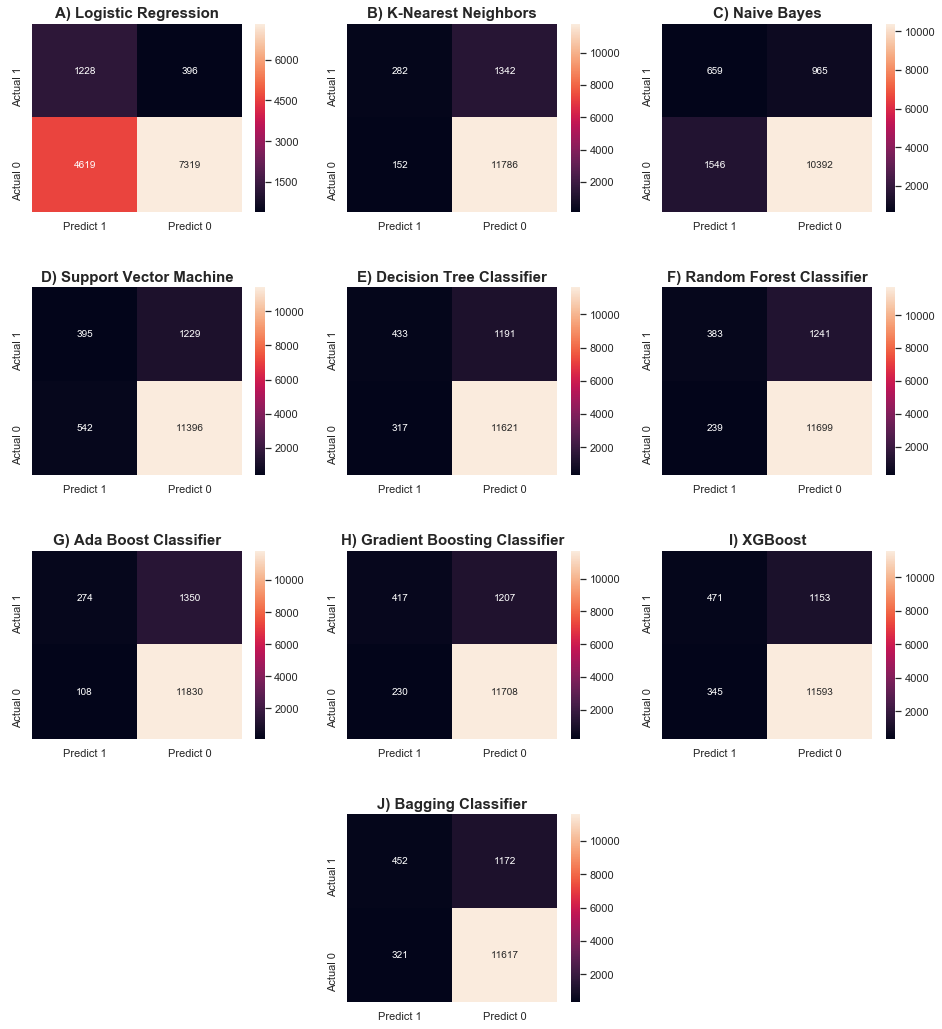

In [67]:
f, ax = plt.subplots(4, 3, figsize = (16,18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
sns.heatmap(LR_df_cm, annot=True, fmt = 'g', ax = ax[0,0])
ax[0,0].set_title("A) Logistic Regression", size = 15, weight = "bold")
sns.heatmap(KNN_df_cm, annot=True, fmt = 'g', ax = ax[0,1])
ax[0,1].set_title("B) K-Nearest Neighbors", size = 15, weight = "bold")
sns.heatmap(NB_df_cm, annot=True, fmt = 'g', ax = ax[0,2])
ax[0,2].set_title("C) Naive Bayes", size = 15, weight = "bold")
sns.heatmap(SVM_df_cm, annot=True, fmt = 'g', ax = ax[1,0])
ax[1,0].set_title("D) Support Vector Machine", size = 15, weight = "bold")
sns.heatmap(DT_df_cm, annot=True, fmt = 'g', ax = ax[1,1])
ax[1,1].set_title("E) Decision Tree Classifier", size = 15, weight = "bold")
sns.heatmap(RF_df_cm, annot=True, fmt = 'g', ax = ax[1,2])
ax[1,2].set_title("F) Random Forest Classifier", size = 15, weight = "bold")
sns.heatmap(AB_df_cm, annot=True, fmt = 'g', ax = ax[2,0])
ax[2,0].set_title("G) Ada Boost Classifier", size = 15, weight = "bold")
sns.heatmap(GB_df_cm, annot=True, fmt = 'g', ax = ax[2,1])
ax[2,1].set_title("H) Gradient Boosting Classifier", size = 15, weight = "bold")
sns.heatmap(XGB_df_cm, annot=True, fmt = 'g', ax = ax[2,2])
ax[2,2].set_title("I) XGBoost", size = 15, weight = "bold")
sns.heatmap(BC_df_cm, annot=True, fmt = 'g', ax = ax[3,1])
ax[3,0].axis('off')
ax[3,1].set_title("J) Bagging Classifier", size = 15, weight = "bold")
ax[3,2].axis('off')
print("Confusion Matrix for all the Models")

- Logistic Regression and Naive Bayes appears to be performing relatively better in identifying Target Class 1

In [68]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

X_CV = scaler.fit_transform(X)
y_CV = np.array(y)

In [69]:
def scores(classifier, model):
    global df_Score, df_Score_mean
    df_Score = pd.DataFrame()
    scoring = ['accuracy', 'recall', 'precision']
    Scores = []
    Models = []
    Scoring = []
    for i in scoring:
        Score = []
        Model = []
        Scorer = []
        Score = cross_val_score(model, X_CV, y_CV.ravel(), cv = 10, n_jobs = -1, scoring = i)
        Model = classifier
        Scorer = i
        Mean = []
        for j in Score:
            Mean.append(j)
            Scores.append(j)
            Models.append(Model)
            Scoring.append(Scorer)
        df_Score_mean = df_Score_mean.append({'Model':Model, 'Metrics':Scorer, 'Mean':round(mean(Mean),3)}, ignore_index=True)      
    df_Score = df_Score.append(pd.DataFrame(list(zip(Models, Scoring, Scores)), columns =['Model', 'Metrics', 'Score']))
    return df_Score

In [70]:
from statistics import mean
classifiers = [('Log_Reg', LR_model), ('KNN', KNN_model), ('NB', NB_model), ('SVM', SVM_model), ('DT', DT_model),
              ('RF', RF_model), ('AB', AB_model), ('GB', GB_model), ('XGB', XGB_model), ('BC', BC_model)]
df_Scores = pd.DataFrame()
df_Score_mean = pd.DataFrame()
for p, q in classifiers:
    scores(p, q)
    df_Scores = df_Scores.append(df_Score)

In [71]:
Mean_Table = pd.pivot_table(df_Score_mean, index=['Metrics'], columns=['Model'])
Mean_Table = pd.DataFrame(Mean_Table.to_records())
Mean_Table.rename(columns = {"('Mean', 'DT')" : 'Decision Tree Classifier', "('Mean', 'KNN')" : 'K-Nearest Neighbours', "('Mean', 'Log_Reg')":'Logistic Regression', "('Mean', 'NB')" : 'Naive Bayes', "('Mean', 'SVM')":'Support Vector Machine', "('Mean', 'RF')":'Random Forest', "('Mean', 'AB')":'Ada Boost', "('Mean', 'GB')":'Gradient Boosting', "('Mean', 'XGB')":'XGBoost', "('Mean', 'BC')":'Bagging'}, inplace=True) 
Mean_Table.set_index('Metrics', inplace = True)
column_order = ['Logistic Regression', 'K-Nearest Neighbours', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest', 'Ada Boost', 'Gradient Boosting', 'XGBoost', 'Bagging']

*** Metrics Mean & Boxplots for all the models ***


Logistic Regression  K-Nearest Neighbours  Naive Bayes  \
Metrics                                                             
accuracy                 0.889                 0.866        0.787   
recall                   0.165                 0.167        0.391   
precision                0.670                 0.331        0.272   

           Support Vector Machine  Decision Tree Classifier  Random Forest  \
Metrics                                                                      
accuracy                    0.731                     0.355          0.474   
recall                      0.188                     0.142          0.151   
precision                   0.167                     0.031          0.032   

           Ada Boost  Gradient Boosting  XGBoost  Bagging  
Metrics                                                    
accuracy       0.822              0.347    0.242    0.230  
recall         0.158              0.147    0.147    0.152  
precision      0.535              0.024    0.022    0.023

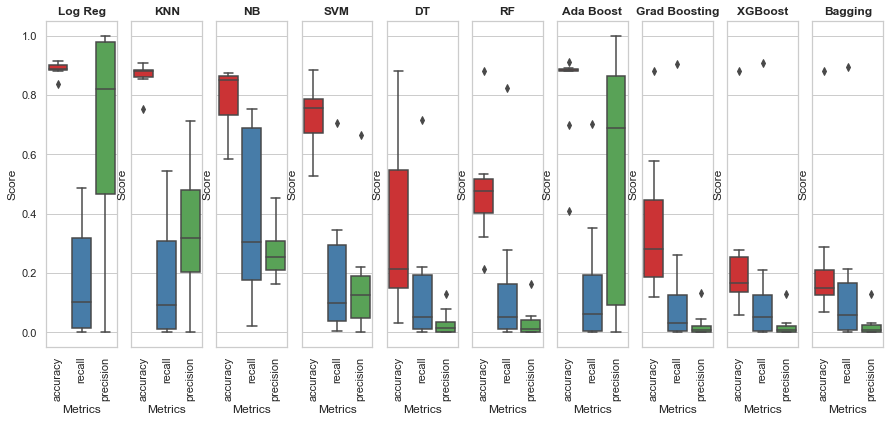

In [72]:
f, ax = plt.subplots(1, 10, sharey=True, figsize = (15,6))
ax[0].set_title("Log Reg", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'Log_Reg'], y = df_Scores.Score[df_Scores.Model == 'Log_Reg'], ax = ax[0])
ax[1].set_title("KNN", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'KNN'], y = df_Scores.Score[df_Scores.Model == 'KNN'], ax = ax[1])
ax[2].set_title("NB", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'NB'], y = df_Scores.Score[df_Scores.Model == 'NB'], ax = ax[2])
ax[3].set_title("SVM", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'SVM'], y = df_Scores.Score[df_Scores.Model == 'SVM'], ax = ax[3])
ax[4].set_title("DT", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'DT'], y = df_Scores.Score[df_Scores.Model == 'DT'], ax = ax[4])
ax[5].set_title("RF", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'RF'], y = df_Scores.Score[df_Scores.Model == 'RF'], ax = ax[5])
ax[6].set_title("Ada Boost", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'AB'], y = df_Scores.Score[df_Scores.Model == 'AB'], ax = ax[6])
ax[7].set_title("Grad Boosting", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'GB'], y = df_Scores.Score[df_Scores.Model == 'GB'], ax = ax[7])
ax[8].set_title("XGBoost", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'XGB'], y = df_Scores.Score[df_Scores.Model == 'XGB'], ax = ax[8])
ax[9].set_title("Bagging", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'BC'], y = df_Scores.Score[df_Scores.Model == 'BC'], ax = ax[9])
for i in range(10):
    ax[i].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
print("*** Metrics Mean & Boxplots for all the models ***")
Mean_Table.reindex(columns = column_order, index = ['accuracy', 'recall', 'precision'])

#### Initial summary
- Boxplot of all 5 algorithms with accuracy, recall score and precision score using 10-fold cross validation.
- Mean of all the scores for each algorithm is also displayed in the table.
- Logistic Regression boxplot is shown here with 0.5 threshold.
- Overall Naive Bayes appears to be giving better results in identifying Target Class 1 even though it has a huge varience in result.

#### Balancing class ###
- Target class 0 is dominating in the dataset as mentioned earlier at 11:89 1 to 0 ratio.
- Hence optimising 'Training dataset' by balancing class, without any modification to 'Test dataset'.

In [73]:
df_O = df.copy(deep=True)
drop_indices = df_O[df_O['Target'] == 0].sample(frac=0.865, replace=False, random_state=1).index
df_O.drop(drop_indices,inplace=True)
X_O = df_O.drop(['Target'], axis=1)
y_O = df_O[['Target']]
X_train_O, X_test_ignore, y_train_O, y_test_ignore = train_test_split(X_O, y_O, test_size=0.30, random_state=1)
X_train_O = scaler.fit_transform(X_train_O)
y_train_O = np.array(y_train_O)
X_test_O = X_test_o.copy(deep=True)
X_test_O = scaler.fit_transform(X_test_O)
y_test_O = y_test

In [74]:
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(df_O.loc[df_O['Target'] == 1]), (len(df_O.loc[df_O['Target'] == 1])/len(df_O.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(df_O.loc[df_O['Target'] == 0]), (len(df_O.loc[df_O['Target'] == 0])/len(df_O.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train_O[y_train_O[:] == 1]), (len(y_train_O[y_train_O[:] == 1])/len(y_train_O)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train_O[y_train_O[:] == 0]), (len(y_train_O[y_train_O[:] == 0])/len(y_train_O)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test_O[y_test_O[:] == 1]), (len(y_test_O[y_test_O[:] == 1])/len(y_test_O)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test_O[y_test_O[:] == 0]), (len(y_test_O[y_test_O[:] == 0])/len(y_test_O)) * 100))
print("")

Original Target True Values    : 5287 (49.52%)
Original Target False Values   : 5389 (50.48%)

Training Target True Values    : 3672 (49.14%)
Training Target False Values   : 3801 (50.86%)

Test Target True Values        : 1624 (11.97%)
Test Target False Values       : 11938 (88.03%)



- Training dataset target values balanced at a ratio of 50:50.
- Various ratios were tried before settling on this ratio, as it gave the best results within those ratios.
- Testing dataset has been left untouched at 10:90 to compare the out of sample results.

In [75]:
NB_model_O = GaussianNB()
NB_model_O.fit(X_train_O, y_train_O.ravel())

NB_y_predict_train_O = NB_model_O.predict(X_train_O)
NB_y_predict_test_O = NB_model_O.predict(X_test_O)

print("*** Naive Bayes ***")
print("Model Accuracy in-sample: {0:.4f}".format(accuracy_score(y_train_O, NB_y_predict_train_O)))
print("Model Accuracy out of sample: {0:.4f}".format(accuracy_score(y_test_O, NB_y_predict_test_O)))
print("Model Recall in-sample: {0:.4f}".format(recall_score(y_train_O, NB_y_predict_train_O)))
print("Model Recall out of sample: {0:.4f}".format(recall_score(y_test_O, NB_y_predict_test_O)))
print(classification_report(y_test_O, NB_y_predict_test_O, labels=[1, 0]))

*** Naive Bayes ***
Model Accuracy in-sample: 0.6479
Model Accuracy out of sample: 0.7591
Model Recall in-sample: 0.4984
Model Recall out of sample: 0.5117
              precision    recall  f1-score   support

           1       0.25      0.51      0.34      1624
           0       0.92      0.79      0.85     11938

    accuracy                           0.76     13562
   macro avg       0.59      0.65      0.59     13562
weighted avg       0.84      0.76      0.79     13562



- Naive Bayes out of sample recall score jumped from 0.4 to 0.5 with the same test dataset.

 A)  Accuracy Score:  0.8149   | Recall Score:  0.4058  | Precision Score:  0.2989 
 B)  Accuracy Score:  0.7591  | Recall Score:  0.5117  | Precision Score:  0.2514


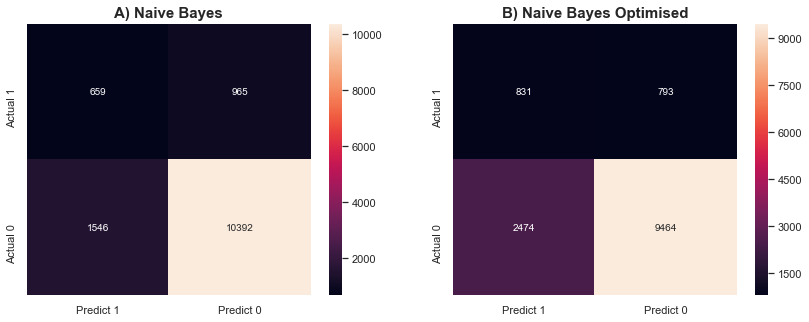

In [76]:
NB_cm=confusion_matrix(y_test, NB_y_predict_test, labels=[1, 0])
NB_df_cm = pd.DataFrame(NB_cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

NB_cm_o=confusion_matrix(y_test_O, NB_y_predict_test_O, labels=[1, 0])
NB_df_cm_o = pd.DataFrame(NB_cm_o, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

f, ax = plt.subplots(1, 2, figsize = (14,5))
sns.heatmap(NB_df_cm, annot=True, fmt = 'g', ax = ax[0])
ax[0].set_title("A) Naive Bayes", size = 15, weight = "bold")
sns.heatmap(NB_df_cm_o, annot=True, fmt = 'g', ax = ax[1])
ax[1].set_title("B) Naive Bayes Optimised", size = 15, weight = "bold")

print(" A) ", "Accuracy Score: ", round(accuracy_score(y_test, NB_y_predict_test), 4), "  | Recall Score: ", round(recall_score(y_test, NB_y_predict_test), 4), " | Precision Score: ", round(precision_score(y_test, NB_y_predict_test), 4), "\n",
"B) ", "Accuracy Score: ", round(accuracy_score(y_test_O, NB_y_predict_test_O), 4), " | Recall Score: ", round(recall_score(y_test_O, NB_y_predict_test_O), 4), " | Precision Score: ", round(precision_score(y_test_O, NB_y_predict_test_O), 4))

- Balancing training target class has improved model performance to identify Target Class 1 slightly.
- Hence checking the performance of other models also with balanced dataset and 10 Fold Cross Validation.

In [77]:
X_CV = scaler.fit_transform(X_O)
y_CV = np.array(y_O)

In [78]:
def scores(classifier, model):
    global df_Score, df_Score_mean
    df_Score = pd.DataFrame()
    scoring = ['accuracy', 'recall', 'precision']
    Scores = []
    Models = []
    Scoring = []
    for i in scoring:
        Score = []
        Model = []
        Scorer = []
        Score = cross_val_score(model, X_CV, y_CV.ravel(), cv = 10, n_jobs = -1, scoring = i)
        Model = classifier
        Scorer = i
        Mean = []
        for j in Score:
            Mean.append(j)
            Scores.append(j)
            Models.append(Model)
            Scoring.append(Scorer)
        df_Score_mean = df_Score_mean.append({'Model':Model, 'Metrics':Scorer, 'Mean':round(mean(Mean),3)}, ignore_index=True)      
    df_Score = df_Score.append(pd.DataFrame(list(zip(Models, Scoring, Scores)), columns =['Model', 'Metrics', 'Score']))
    return df_Score

In [79]:
classifiers = [('Log_Reg', LR_model), ('KNN', KNN_model), ('NB', NB_model), ('SVM', SVM_model), ('DT', DT_model),
              ('RF', RF_model), ('AB', AB_model), ('GB', GB_model), ('XGB', XGB_model), ('BC', BC_model)]
df_Scores = pd.DataFrame()
df_Score_mean = pd.DataFrame()
for p, q in classifiers:
    scores(p, q)
    df_Scores = df_Scores.append(df_Score)

In [80]:
Mean_Table = pd.pivot_table(df_Score_mean, index=['Metrics'], columns=['Model'])
Mean_Table = pd.DataFrame(Mean_Table.to_records())
Mean_Table.rename(columns = {"('Mean', 'DT')" : 'Decision Tree Classifier', "('Mean', 'KNN')" : 'K-Nearest Neighbours', "('Mean', 'Log_Reg')":'Logistic Regression', "('Mean', 'NB')" : 'Naive Bayes', "('Mean', 'SVM')":'Support Vector Machine', "('Mean', 'RF')":'Random Forest', "('Mean', 'AB')":'Ada Boost', "('Mean', 'GB')":'Gradient Boosting', "('Mean', 'XGB')":'XGBoost', "('Mean', 'BC')":'Bagging'}, inplace=True) 
Mean_Table.set_index('Metrics', inplace = True)
column_order = ['Logistic Regression', 'K-Nearest Neighbours', 'Naive Bayes', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest', 'Ada Boost', 'Gradient Boosting', 'XGBoost', 'Bagging']

*** Metrics Mean & Boxplots for all the models ***


Logistic Regression  K-Nearest Neighbours  Naive Bayes  \
Metrics                                                             
accuracy                 0.582                 0.551        0.609   
recall                   0.593                 0.549        0.481   
precision                0.650                 0.561        0.652   

           Support Vector Machine  Decision Tree Classifier  Random Forest  \
Metrics                                                                      
accuracy                    0.430                     0.308          0.327   
recall                      0.493                     0.425          0.480   
precision                   0.454                     0.380          0.395   

           Ada Boost  Gradient Boosting  XGBoost  Bagging  
Metrics                                                    
accuracy       0.420              0.273    0.273    0.287  
recall         0.483              0.403    0.405    0.426  
precision      0.432              0.348    0.302    0.306

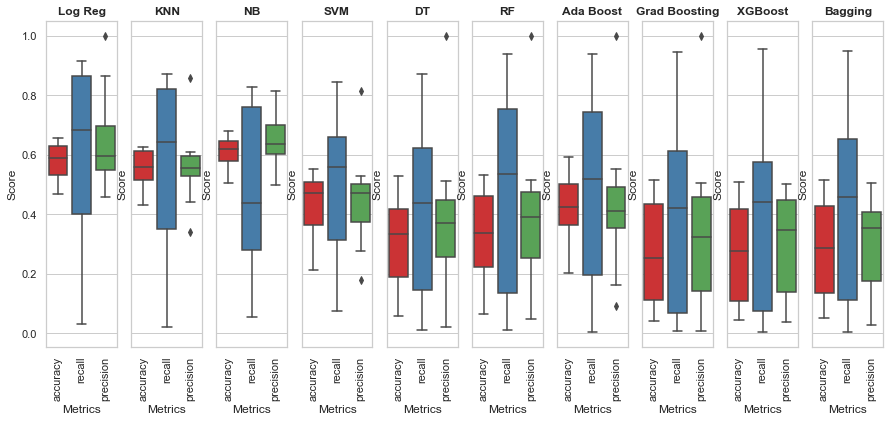

In [81]:
f, ax = plt.subplots(1, 10, sharey=True, figsize = (15,6))
ax[0].set_title("Log Reg", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'Log_Reg'], y = df_Scores.Score[df_Scores.Model == 'Log_Reg'], ax = ax[0])
ax[1].set_title("KNN", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'KNN'], y = df_Scores.Score[df_Scores.Model == 'KNN'], ax = ax[1])
ax[2].set_title("NB", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'NB'], y = df_Scores.Score[df_Scores.Model == 'NB'], ax = ax[2])
ax[3].set_title("SVM", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'SVM'], y = df_Scores.Score[df_Scores.Model == 'SVM'], ax = ax[3])
ax[4].set_title("DT", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'DT'], y = df_Scores.Score[df_Scores.Model == 'DT'], ax = ax[4])
ax[5].set_title("RF", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'RF'], y = df_Scores.Score[df_Scores.Model == 'RF'], ax = ax[5])
ax[6].set_title("Ada Boost", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'AB'], y = df_Scores.Score[df_Scores.Model == 'AB'], ax = ax[6])
ax[7].set_title("Grad Boosting", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'GB'], y = df_Scores.Score[df_Scores.Model == 'GB'], ax = ax[7])
ax[8].set_title("XGBoost", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'XGB'], y = df_Scores.Score[df_Scores.Model == 'XGB'], ax = ax[8])
ax[9].set_title("Bagging", size = 12, weight = "bold")
sns.boxplot(x = df_Scores.Metrics[df_Scores.Model == 'BC'], y = df_Scores.Score[df_Scores.Model == 'BC'], ax = ax[9])
for i in range(10):
    ax[i].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
print("*** Metrics Mean & Boxplots for all the models ***")
Mean_Table.reindex(columns = column_order, index = ['accuracy', 'recall', 'precision'])

### Summary
- Boxplot of all 5 algorithms with accuracy, recall score and precision score using 10-fold cross validation with class balanced dataset.
- Mean of all the scores for each algorithm is also displayed in the table.
- Recall scores of all the models appear to have slightly improved.
- __Logistic Regression__ can be chosen as the first preference with mean out of sample recall score of __0.593__ and mean precision score of __0.650__.

#### Based on time constraints below path could not be explored
- Logistic Regression Score can be further tweaked by applying an optimised threshold.
- Model can also be further studied by dropping Previous Outcome as it has the major influence on the Target, but also has the maximum unknown values.